# AMS data analysis

## Import modules

In [1]:
import sys
import os
# Get the parent directory
parent_folder = os.path.dirname(os.getcwd())
# add the parent directory to the Python path so that the scripts can be imported
sys.path.append(parent_folder)

In [2]:
from modules.data_exploration import data_explorer

## Data Description

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scienceplots
plt.style.use(['science'])

## Load Data

In [4]:
# pay attention to the file path
fname_ams = '../data/nl/Households in Amsterdam PV and demand data.xlsx'
# read the two sheets for PV(sheet0) and consumption(sheet1)
df_ams_pv = pd.read_excel(fname_ams, sheet_name=0)
df_ams_con = pd.read_excel(fname_ams, sheet_name=1)

In [5]:
ams_explorer = data_explorer(df_ams_pv, df_ams_con)

In [6]:
# quick look of the PV gen
ams_explorer.pv_data.head()

Timestamp  1011W  1954W  1955A  1964J   2053G  2108P  2442E  3070L  3307S  \
0  1491130800    NaN    NaN    NaN    NaN  2263.0    NaN    NaN    NaN    NaN   
1  1491134400    NaN    NaN    NaN    NaN  2320.5    NaN    NaN    NaN    NaN   
2  1491138000    NaN    NaN    NaN    NaN  1574.3    NaN    NaN    NaN    NaN   
3  1491141600    NaN    NaN    NaN    NaN  1673.8    NaN    NaN    NaN    NaN   
4  1491145200    NaN    NaN    NaN    NaN  1421.1    NaN    NaN    NaN    NaN   

   ...  7099P  7426U   7679U  7710F  7743P  8319Q  9248C   9370J  9506H  9991J  
0  ...    NaN    NaN  2097.0    NaN    NaN    NaN    NaN  1626.1    NaN    NaN  
1  ...    NaN    NaN  2145.9    NaN    NaN    NaN    NaN  1635.6    NaN    NaN  
2  ...    NaN    NaN  1518.2    NaN    NaN    NaN    NaN  1075.1    NaN    NaN  
3  ...    NaN    NaN  1618.4    NaN    NaN    NaN    NaN  1307.0    NaN    NaN  
4  ...    NaN    NaN  1240.8    NaN    NaN    NaN    NaN   950.0    NaN    NaN  

[5 rows x 28 columns]

In [ ]:
# quick look of the consumption
ams_explorer.con_data.head()

Timestamp  1011W  1954W  1955A  1964J  2053G  2108P  2442E  3070L  3307S  \
0  1491130800    NaN    NaN    NaN    NaN  887.6    NaN    NaN    NaN    NaN   
1  1491134400    NaN    NaN    NaN    NaN  362.4    NaN    NaN    NaN    NaN   
2  1491138000    NaN    NaN    NaN    NaN  219.7    NaN    NaN    NaN    NaN   
3  1491141600    NaN    NaN    NaN    NaN  222.9    NaN    NaN    NaN    NaN   
4  1491145200    NaN    NaN    NaN    NaN  211.9    NaN    NaN    NaN    NaN   

   ...  7099P  7426U  7679U  7710F  7743P  8319Q  9248C  9370J  9506H  9991J  
0  ...    NaN    NaN   51.2    NaN    NaN    NaN    NaN  385.4    NaN    NaN  
1  ...    NaN    NaN   44.1    NaN    NaN    NaN    NaN  414.7    NaN    NaN  
2  ...    NaN    NaN   25.1    NaN    NaN    NaN    NaN  257.1    NaN    NaN  
3  ...    NaN    NaN    2.7    NaN    NaN    NaN    NaN  339.4    NaN    NaN  
4  ...    NaN    NaN    0.0    NaN    NaN    NaN    NaN   89.9    NaN    NaN  

[5 rows x 28 columns]

## Convert Unix time to date and time

In [8]:
ams_explorer.unix_time_to_datetime()

## Overview of the data

In [ ]:
# pandas summary pv data
ams_explorer.pv_data.describe()

Timestamp                       datetime         1011W        1954W  \
count  1.696000e+04                          16960  14580.000000  7267.000000   
mean   1.521667e+09  2018-03-21 21:19:57.169811456    341.107503   317.922458   
min    1.491131e+09            2017-04-02 11:00:00      0.000000     0.000000   
25%    1.506394e+09            2017-09-26 02:45:00      0.000000     0.000000   
50%    1.521671e+09            2018-03-21 22:30:00      0.000000     0.000000   
75%    1.536934e+09            2018-09-14 14:15:00    420.550000   338.200000   
max    1.552198e+09            2019-03-10 06:00:00   2784.000000  2860.300000   
std    1.763100e+07                            NaN    599.352696   596.264868   

             1955A         1964J         2053G        2108P        2442E  \
count  7205.000000  13346.000000  16948.000000  1689.000000  7252.000000   
mean    289.430895    312.195264    427.541698   344.565483   177.423966   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       0.000000      0.000000      0.000000     0.000000     0.000000   
50%       0.000000     66.400000      1.200000     0.000000     0.000000   
75%     335.800000    311.075000    584.800000   551.400000   166.800000   
max    2775.900000   2778.800000   3312.500000  1913.500000  1592.500000   
std     525.546497    549.941795    721.823771   540.408817   337.392428   

              3070L  ...        7099P        7426U         7679U  \
count  15925.000000  ...  4145.000000  8238.000000  16107.000000   
mean     322.855058  ...   140.481544   116.446419    358.998702   
min        0.000000  ...     0.000000     0.000000      0.000000   
25%        0.000000  ...     0.000000     0.000000      0.000000   
50%        7.600000  ...     0.000000     0.000000      0.000000   
75%      424.600000  ...    78.000000   134.175000    433.000000   
max     2317.100000  ...  2011.000000   969.000000   2970.700000   
std      537.271135  ...   335.417461   210.397266    642.839496   

              7710F       7743P        8319Q        9248C         9370J  \
count  15061.000000  878.000000  8799.000000  8695.000000  16903.000000   
mean     163.791800    7.468907   365.042198   116.691742    323.584979   
min        0.000000    0.000000     0.000000     0.000000      0.000000   
25%        0.000000    0.000000     0.000000     0.000000      0.000000   
50%        1.100000    2.200000     1.100000     0.000000      3.900000   
75%      133.200000    2.400000   464.700000   146.100000    451.500000   
max     1555.800000  347.100000  2519.000000   947.000000   2467.000000   
std      325.815261   34.438445   619.928921   207.110267    536.456021   

              9506H        9991J  
count  10583.000000  7267.000000  
mean     312.451583   730.698362  
min        0.000000     0.000000  
25%       73.000000     0.000000  
50%      110.700000     0.000000  
75%      182.550000   891.650000  
max     4749.700000  6238.900000  
std      690.033704  1296.346658  

[8 rows x 29 columns]

In [10]:
# pandas summary consumption data
ams_explorer.con_data.describe()

Timestamp                       datetime         1011W        1954W  \
count  1.696000e+04                          16960  14580.000000  7267.000000   
mean   1.521667e+09  2018-03-21 21:19:57.169811456    325.205432   418.245273   
min    1.491131e+09            2017-04-02 11:00:00      8.900000    11.400000   
25%    1.506394e+09            2017-09-26 02:45:00    158.800000   259.300000   
50%    1.521671e+09            2018-03-21 22:30:00    225.950000   311.400000   
75%    1.536934e+09            2018-09-14 14:15:00    367.100000   430.100000   
max    1.552198e+09            2019-03-10 06:00:00   2358.100000  2823.300000   
std    1.763100e+07                            NaN    263.840929   308.068459   

             1955A         1964J         2053G        2108P        2442E  \
count  7205.000000  13346.000000  16948.000000  1689.000000  7252.000000   
mean    333.397627    611.996950    392.976711   558.188632   465.844250   
min       6.400000      0.000000     13.400000     0.500000    44.400000   
25%     102.200000    125.300000    219.700000    75.600000   233.600000   
50%     172.200000    237.350000    278.000000   267.400000   289.050000   
75%     374.800000    731.200000    444.825000   986.300000   526.900000   
max    3523.300000   7032.300000   2647.000000  2851.400000  3816.600000   
std     384.506000    833.608855    281.682021   624.551120   410.117211   

              3070L  ...        7099P        7426U         7679U        7710F  \
count  15925.000000  ...  4145.000000  8238.000000  16107.000000  15061.00000   
mean     314.117570  ...   816.106779   444.054613    329.067617    564.44918   
min        0.000000  ...     0.000000     0.000000      0.000000      0.00000   
25%      132.300000  ...   570.900000   260.800000    155.850000    164.00000   
50%      202.500000  ...   712.800000   343.500000    224.400000    352.60000   
75%      362.800000  ...   926.200000   491.200000    357.600000    816.20000   
max     4103.600000  ...  3364.400000  4095.800000   4192.700000   4321.00000   
std      303.274803  ...   412.101200   376.663446    351.658903    563.71740   

              7743P        8319Q        9248C         9370J         9506H  \
count    878.000000  8799.000000  8695.000000  16903.000000  10583.000000   
mean    1174.492597   321.380009   197.715457    228.716902    371.404951   
min       14.600000     0.000000     5.300000      5.500000      0.000000   
25%      213.275000   124.150000   104.300000     87.500000     94.900000   
50%      487.150000   200.200000   136.600000    127.400000    123.700000   
75%      985.175000   359.550000   187.500000    241.000000    265.050000   
max    11838.400000  4291.900000  2267.300000   2978.400000   4749.700000   
std     2244.915540   393.177982   201.776378    263.972622    701.552365   

             9991J  
count  7267.000000  
mean    866.540498  
min       0.000000  
25%     217.600000  
50%     481.700000  
75%    1118.400000  
max    6996.200000  
std     937.021911  

[8 rows x 29 columns]

In [11]:
ams_explorer.pv_data.columns

Index(['Timestamp', 'datetime', '1011W', '1954W', '1955A', '1964J', '2053G',
       '2108P', '2442E', '3070L', '3307S', '3517V', '3660D', '3726A', '3932W',
       '4226R', '4451M', '5427W', '5815T', '7099P', '7426U', '7679U', '7710F',
       '7743P', '8319Q', '9248C', '9370J', '9506H', '9991J'],
      dtype='object')

In [12]:
# count number of columns
ams_explorer.con_data.columns.size

29

Quick summary of the data:
1. number of households: 27
2. Time related information:
    - Start date and time:2017-04-02 11:00:00
    - End date and time: 2019-03-10 06:00:00
    - Time resolution: hourly

## Explore columns

### Completeness of data

1. The missing rate of PV and consumption data are the same.
2. Average missing rate for all households: 38.96%

In [13]:
# show the percentage of missing data for each column, for both PV and consumption
ams_explorer.calculate_missing_rate()
print(ams_explorer.missing_rate)

           PV missing rate  Consumption missing rate
Timestamp         0.000000                  0.000000
datetime          0.000000                  0.000000
1011W             0.140330                  0.140330
1954W             0.571521                  0.571521
1955A             0.575177                  0.575177
1964J             0.213090                  0.213090
2053G             0.000708                  0.000708
2108P             0.900413                  0.900413
2442E             0.572406                  0.572406
3070L             0.061026                  0.061026
3307S             0.670637                  0.670637
3517V             0.535908                  0.535908
3660D             0.513090                  0.513090
3726A             0.529068                  0.529068
3932W             0.515920                  0.515920
4226R             0.157665                  0.157665
4451M             0.577712                  0.577712
5427W             0.439741                  0.

In [14]:
# check if the PV missing rate and consumption missing rate are the same
print(ams_explorer.missing_rate_same)

True


In [15]:
# average missing rate of PV data, consumption data
print(f'Average missing rate of PV data: {ams_explorer.missing_rate_avg_pv},'
      f'\nAverage missing rate of consumption data: {ams_explorer.missing_rate_avg_con}')

Average missing rate of PV data: 0.38964297332465836,
Average missing rate of consumption data: 0.38964297332465836


### Calculate net load

Net Load = Consumption - PV

In [16]:
ams_explorer.calculate_net_load()
ams_explorer.net_data.head()

datetime   Timestamp  1011W  1954W  1955A  1964J   2053G  2108P  \
0 2017-04-02 11:00:00  1491130800    NaN    NaN    NaN    NaN -1375.4    NaN   
1 2017-04-02 12:00:00  1491134400    NaN    NaN    NaN    NaN -1958.1    NaN   
2 2017-04-02 13:00:00  1491138000    NaN    NaN    NaN    NaN -1354.6    NaN   
3 2017-04-02 14:00:00  1491141600    NaN    NaN    NaN    NaN -1450.9    NaN   
4 2017-04-02 15:00:00  1491145200    NaN    NaN    NaN    NaN -1209.2    NaN   

   2442E  3070L  ...  7099P  7426U   7679U  7710F  7743P  8319Q  9248C  \
0    NaN    NaN  ...    NaN    NaN -2045.8    NaN    NaN    NaN    NaN   
1    NaN    NaN  ...    NaN    NaN -2101.8    NaN    NaN    NaN    NaN   
2    NaN    NaN  ...    NaN    NaN -1493.1    NaN    NaN    NaN    NaN   
3    NaN    NaN  ...    NaN    NaN -1615.7    NaN    NaN    NaN    NaN   
4    NaN    NaN  ...    NaN    NaN -1240.8    NaN    NaN    NaN    NaN   

    9370J  9506H  9991J  
0 -1240.7    NaN    NaN  
1 -1220.9    NaN    NaN  
2  -818.0    NaN    NaN  
3  -967.6    NaN    NaN  
4  -860.1    NaN    NaN  

[5 rows x 29 columns]

### Merge 3 dataframes into 1

The merge facilitates latter operations on the data. In the merged dataframe, the time related columns are the same, and the columns of PV, consumption and net load are renamed with suffixes.

In [17]:
ams_explorer.add_datetime_columns()

/home/jhe/prjs/capacity-estimation/modules/data_exploration.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.pv_data.loc[:, col] = func(self.pv_data['datetime'])
/home/jhe/prjs/capacity-estimation/modules/data_exploration.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.con_data.loc[:, col] = func(self.con_data['datetime'])
/home/jhe/prjs/capacity-estimation/modules/data_exploration.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [18]:
ams_explorer.merge_data()

In [19]:
ams_explorer.ams_data.head()

datetime   Timestamp  HoD  dow  doy  month  year  1011W_pv  \
0 2017-04-02 11:00:00  1491130800   11    6   92      4  2017       NaN   
1 2017-04-02 12:00:00  1491134400   12    6   92      4  2017       NaN   
2 2017-04-02 13:00:00  1491138000   13    6   92      4  2017       NaN   
3 2017-04-02 14:00:00  1491141600   14    6   92      4  2017       NaN   
4 2017-04-02 15:00:00  1491145200   15    6   92      4  2017       NaN   

   1954W_pv  1955A_pv  ...  7099P_net  7426U_net  7679U_net  7710F_net  \
0       NaN       NaN  ...        NaN        NaN    -2045.8        NaN   
1       NaN       NaN  ...        NaN        NaN    -2101.8        NaN   
2       NaN       NaN  ...        NaN        NaN    -1493.1        NaN   
3       NaN       NaN  ...        NaN        NaN    -1615.7        NaN   
4       NaN       NaN  ...        NaN        NaN    -1240.8        NaN   

   7743P_net  8319Q_net  9248C_net  9370J_net  9506H_net  9991J_net  
0        NaN        NaN        NaN    -1240.7        NaN        NaN  
1        NaN        NaN        NaN    -1220.9        NaN        NaN  
2        NaN        NaN        NaN     -818.0        NaN        NaN  
3        NaN        NaN        NaN     -967.6        NaN        NaN  
4        NaN        NaN        NaN     -860.1        NaN        NaN  

[5 rows x 88 columns]

In [20]:
ams_explorer.ams_data.describe()

datetime     Timestamp           HoD  \
count                          16960  1.696000e+04  16960.000000   
mean   2018-03-21 21:19:57.169811456  1.521667e+09     11.501887   
min              2017-04-02 11:00:00  1.491131e+09      0.000000   
25%              2017-09-26 02:45:00  1.506394e+09      5.750000   
50%              2018-03-21 22:30:00  1.521671e+09     12.000000   
75%              2018-09-14 14:15:00  1.536934e+09     18.000000   
max              2019-03-10 06:00:00  1.552198e+09     23.000000   
std                              NaN  1.763100e+07      6.923146   

                dow           doy         month          year      1011W_pv  \
count  16960.000000  16960.000000  16960.000000  16960.000000  14580.000000   
mean       2.999410    186.337087      6.638620   2017.709788    341.107503   
min        0.000000      1.000000      1.000000   2017.000000      0.000000   
25%        1.000000    100.000000      4.000000   2017.000000      0.000000   
50%        3.000000    189.000000      7.000000   2018.000000      0.000000   
75%        5.000000    277.000000     10.000000   2018.000000    420.550000   
max        6.000000    365.000000     12.000000   2019.000000   2784.000000   
std        1.999852    105.394955      3.445191      0.631895    599.352696   

          1954W_pv     1955A_pv  ...    7099P_net    7426U_net     7679U_net  \
count  7267.000000  7205.000000  ...  4145.000000  8238.000000  16107.000000   
mean    317.922458   289.430895  ...   675.625235   327.608194    -29.931086   
min       0.000000     0.000000  ... -1222.700000  -784.000000  -2774.200000   
25%       0.000000     0.000000  ...   506.100000   181.125000      6.200000   
50%       0.000000     0.000000  ...   632.700000   294.900000    137.000000   
75%     338.200000   335.800000  ...   884.400000   442.800000    240.750000   
max    2860.300000  2775.900000  ...  3364.400000  4095.800000   3586.400000   
std     596.264868   525.546497  ...   547.556878   419.493489    623.621917   

          7710F_net     7743P_net    8319Q_net    9248C_net     9370J_net  \
count  15061.000000    878.000000  8799.000000  8695.000000  16903.000000   
mean     400.657380   1167.023690   -43.662189    81.023715    -94.868077   
min    -1366.700000    -35.500000 -2422.900000  -834.200000  -2366.100000   
25%      102.000000    202.925000  -128.550000    16.300000   -216.150000   
50%      264.900000    486.450000   113.500000   103.300000     81.800000   
75%      691.700000    983.350000   284.750000   157.800000    163.700000   
max     4321.000000  11836.000000  2615.300000  2267.200000   2749.300000   
std      592.583187   2247.549514   679.917357   286.346048    603.740732   

          9506H_net    9991J_net  
count  10583.000000  7267.000000  
mean      58.953369   135.842136  
min        0.000000 -6064.300000  
25%        0.000000  -379.800000  
50%        0.000000   250.900000  
75%        0.200000   960.250000  
max     2187.600000  6996.200000  
std      225.070040  1761.623306  

[8 rows x 88 columns]

### Plot data availability heat map

This helps when we do a sensitivity analysis on the data availability. When we compare 1 month of data availability and 3 months of data availability, we roughly want 30 days and 90 days of data, respectively. We do not want a length of 3 month, that only contains 60 days of data, and 30 days of NaNs.

In [21]:
ams_explorer.calc_monthly_data_availability()

shape of monthly_data_availability: (27, 24)


year-month    2017-04  2017-05    2017-06     2017-07     2017-08    2017-09  \
1011W        0.000000      0.0   0.000000   70.161290  100.000000  96.774194   
1954W        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
1955A        0.000000      0.0   0.000000   40.053763  100.000000  89.650538   
1964J        0.000000      0.0   0.000000    0.000000    5.510753  96.774194   
2053G       92.069892    100.0  96.774194   99.462366  100.000000  96.774194   
2108P        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
2442E        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
3070L       39.784946    100.0  96.774194  100.000000   98.790323  94.892473   
3307S        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
3517V        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
3660D        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
3726A        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
3932W        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
4226R        0.000000      0.0   0.000000   34.274194  100.000000  94.623656   
4451M        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
5427W        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
5815T       92.069892    100.0  96.774194  100.000000  100.000000  96.774194   
7099P        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
7426U        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
7679U       89.919355    100.0  61.424731   98.521505  100.000000  23.655914   
7710F        0.000000      0.0  75.268817  100.000000  100.000000  94.220430   
7743P        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
8319Q        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
9248C        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   
9370J       92.069892    100.0  96.774194  100.000000  100.000000  95.967742   
9506H        0.000000      0.0   0.000000    0.000000    0.268817   5.376344   
9991J        0.000000      0.0   0.000000    0.000000    0.000000   0.000000   

year-month    2017-10    2017-11    2017-12     2018-01  ...     2018-06  \
1011W       99.731183  96.236559  99.731183  100.000000  ...   96.774194   
1954W        0.000000   0.000000   0.000000    0.000000  ...   96.774194   
1955A       99.327957  96.505376  99.596774  100.000000  ...    0.000000   
1964J       99.731183  96.505376  98.252688  100.000000  ...   96.774194   
2053G       99.731183  96.505376  99.596774  100.000000  ...   96.774194   
2108P        0.000000   0.000000   0.000000    0.000000  ...  100.000000   
2442E        0.000000   0.000000   0.000000    0.000000  ...   96.774194   
3070L       99.596774  33.870968  79.704301  100.000000  ...   96.774194   
3307S        0.000000   0.000000   0.000000    0.000000  ...   96.639785   
3517V        0.000000   0.000000   0.000000    0.000000  ...   96.774194   
3660D        0.000000   0.000000   0.000000    0.000000  ...   96.774194   
3726A        0.000000   0.000000   0.000000    0.000000  ...   96.774194   
3932W        0.000000   0.000000   0.000000    0.000000  ...   96.774194   
4226R       98.790323  96.505376  99.462366  100.000000  ...   96.774194   
4451M        0.000000   0.000000   0.000000    0.000000  ...   96.774194   
5427W        0.000000   0.000000   0.000000    4.301075  ...   96.639785   
5815T       99.731183  96.505376  98.118280  100.000000  ...   96.774194   
7099P        0.000000   0.000000   0.000000    0.000000  ...    0.000000   
7426U        0.000000   0.000000   0.000000    0.000000  ...   95.833333   
7679U       99.596774  96.505376  99.731183  100.000000  ...   96.639785   
7710F       97.177419  96.236559  95.698925  100.000000  ...   86.155914   
7743P        0.000000   0.000000   0.000000    0.000000  ...    0.000000   
8319Q      

In [22]:
ams_explorer.data_availability_heat_map()

### Save the merged dataframe

In [23]:
# save the merged dataframe to a csv file
ams_explorer.ams_data.to_csv('../data/nl/ams_pv_con_net.csv', index=False)

### Plot individual PV data

In [24]:
# get the columns to plot, excluding datetime,Timestamp,HoD,dow,doy,month,year
cols_to_plot_all = ams_explorer.pv_data.columns.drop(
    ['Timestamp', 'datetime', 'HoD', 'dow', 'doy', 'month', 'year'])

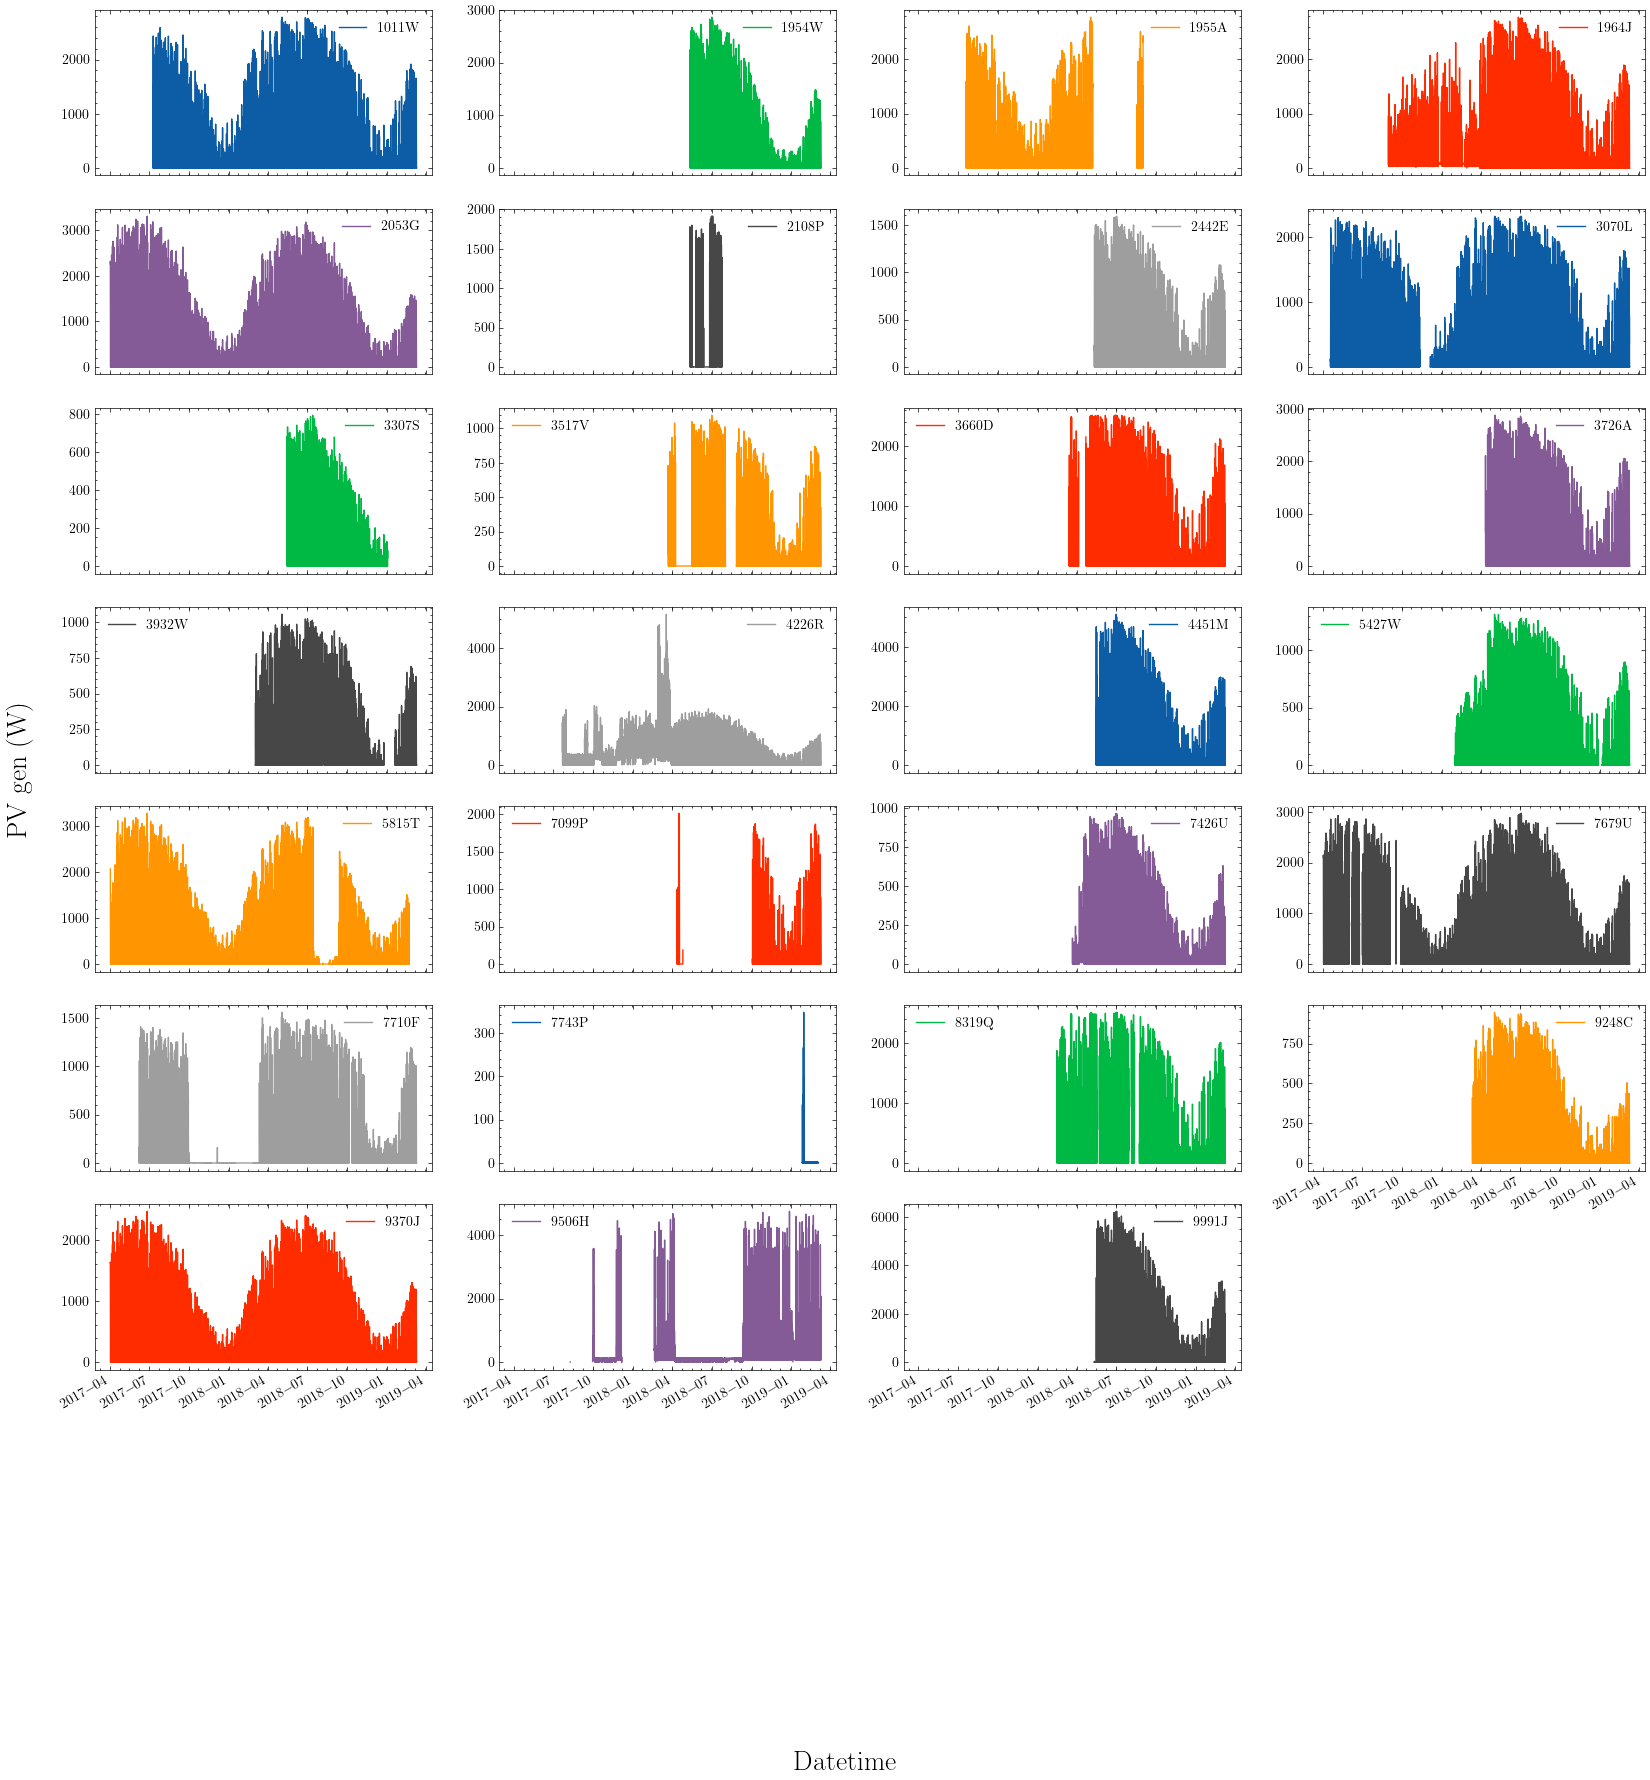

In [25]:
ams_explorer.df_common_xylabel_plot(
    df=ams_explorer.pv_data, y=cols_to_plot_all, ylabel='PV gen (W)')

In [26]:
ams_explorer.pv_data.columns

Index(['datetime', 'Timestamp', 'HoD', 'dow', 'doy', 'month', 'year', '1011W',
       '1954W', '1955A', '1964J', '2053G', '2108P', '2442E', '3070L', '3307S',
       '3517V', '3660D', '3726A', '3932W', '4226R', '4451M', '5427W', '5815T',
       '7099P', '7426U', '7679U', '7710F', '7743P', '8319Q', '9248C', '9370J',
       '9506H', '9991J'],
      dtype='object')

### Plot individual consumption data

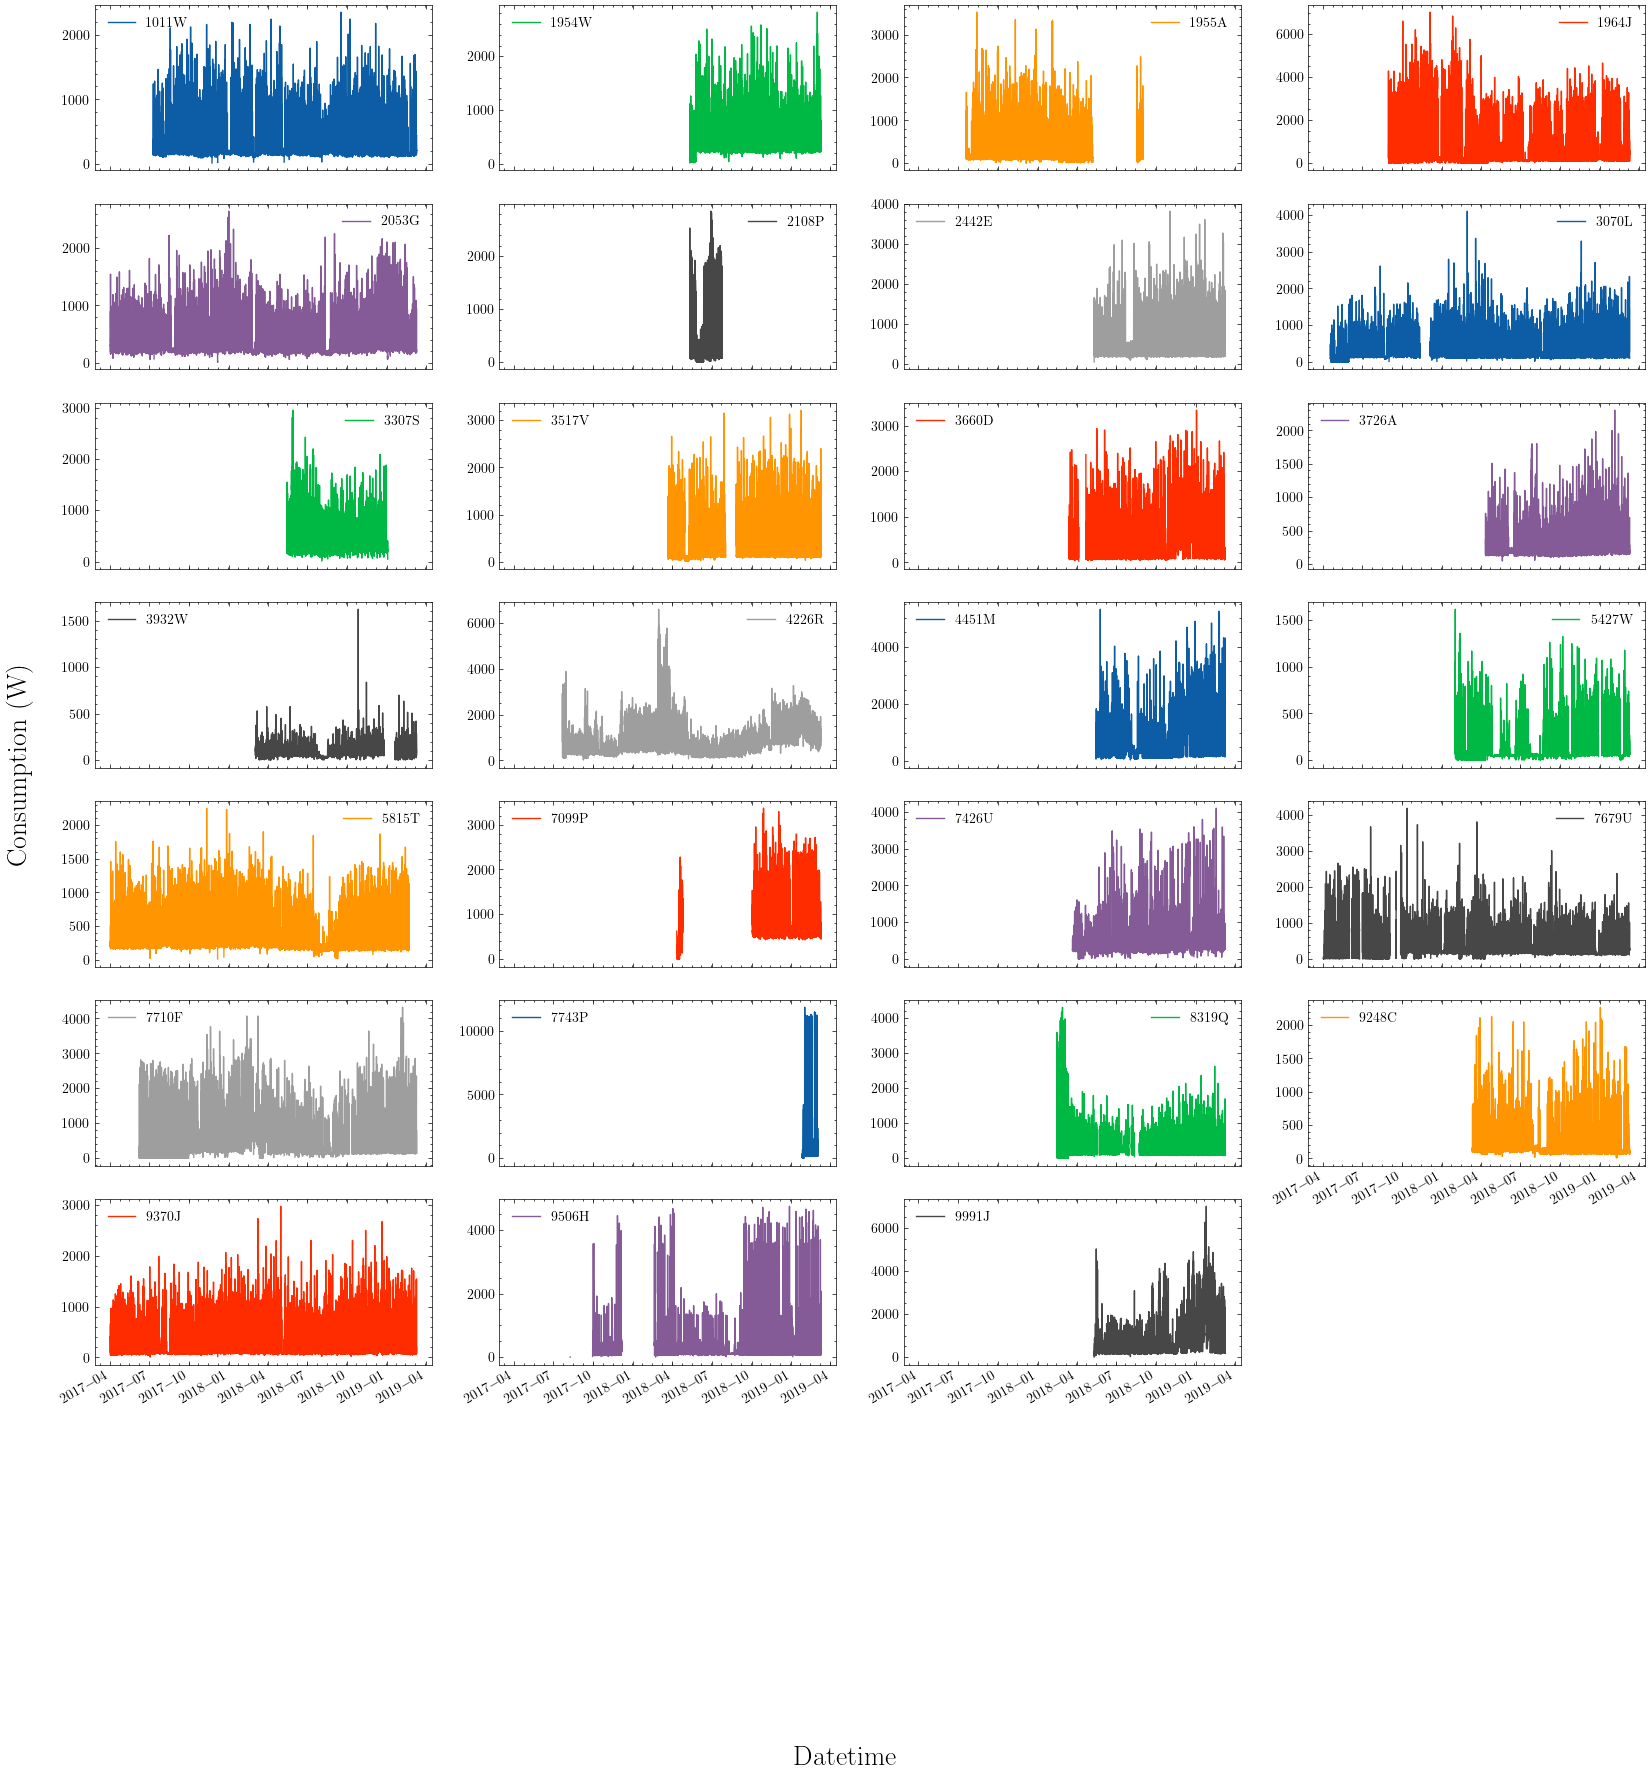

In [27]:
ams_explorer.df_common_xylabel_plot(
    df=ams_explorer.con_data, y=cols_to_plot_all, ylabel='Consumption (W)')

### Plot individual net load data

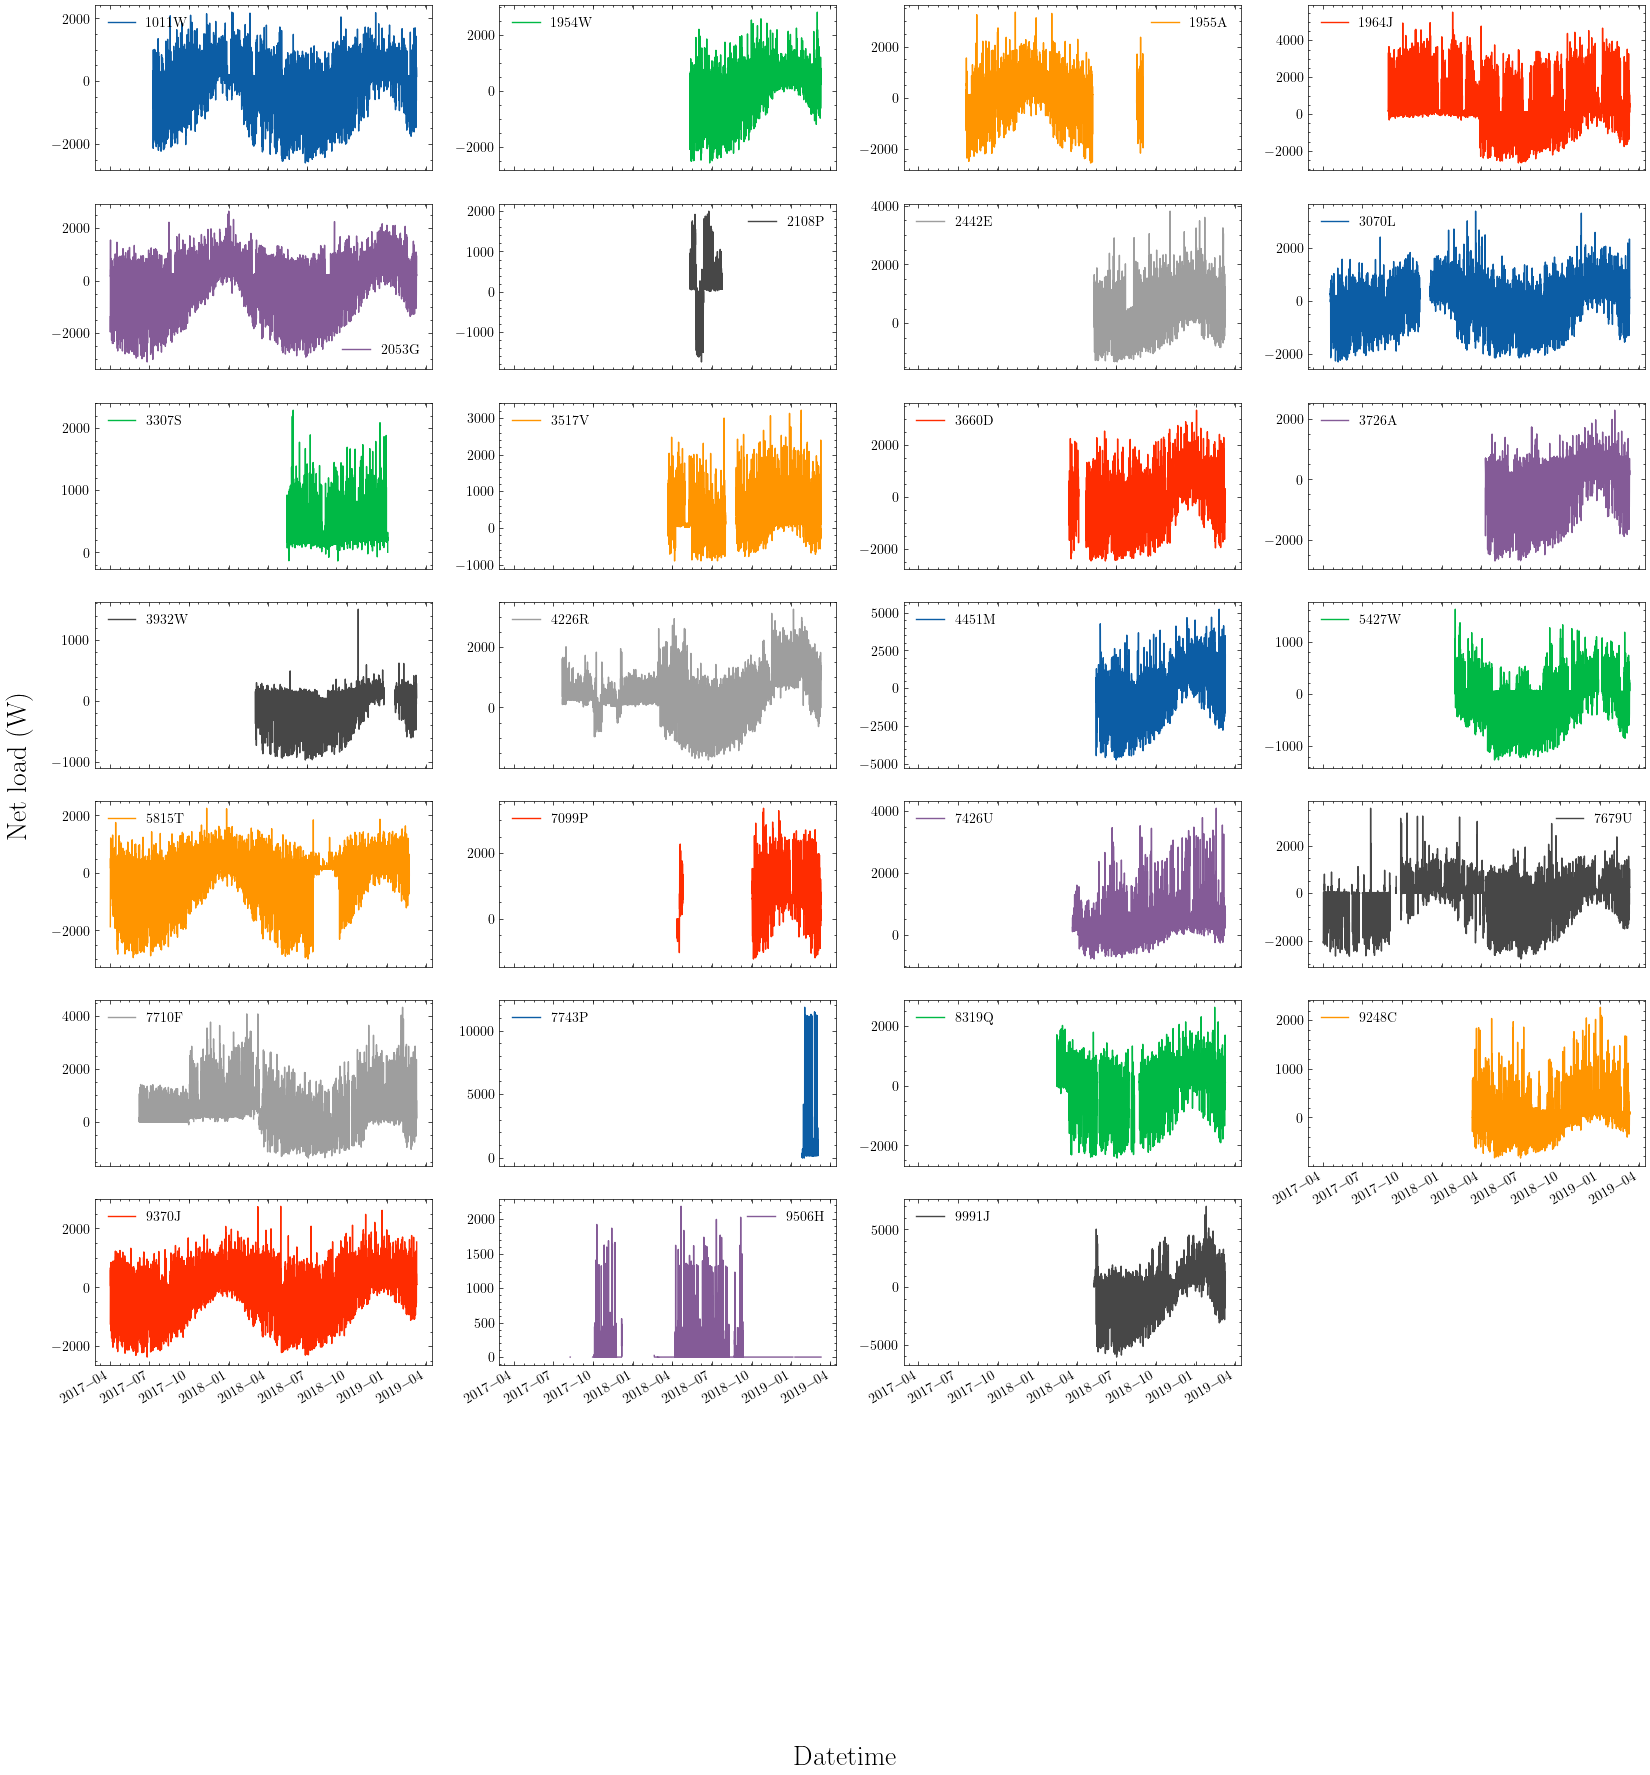

In [28]:
ams_explorer.df_common_xylabel_plot(
    df=ams_explorer.net_data, y=cols_to_plot_all, ylabel='Net load (W)')

### Check the special households
Below are the special households. HH tot means household total.
| Code  | City  | HH tot | Type  | Area (m^2)  | kWp installed of PV system  | Remarks  |
|---|---|---|---|---|---|---|
| 7743P  | AMS  | 4  | House  | > 130  | 1.1  | Electric Vehicle  |
| 1964J  | AMS  | 4  | House  | > 130  | 3.27  | Electric Vehicle  |
| 9506H  | AMS  | 4  | House  | > 130  | 0  | No solar (ignore it). Electric Vehicle  |
| 4226R  | AMS  | 2  | Boathouse  | > 130  | 3.85  | All electric (including heating)  |
| 9991J  | AMS  | 2  | Boathouse  | > 130  | 8.4  | Heat pumps  |
| 4451M  | AMS  | 4  | Boathouse  | > 130  | 6.9  | Heat pumps  |


#### Plot buildings with electric vehicle
| Code  | City  | HH tot | Type  | Area (m^2)  | kWp installed of PV system  | Remarks  |
|---|---|---|---|---|---|---|
| 7743P  | AMS  | 4  | House  | > 130  | 1.1  | Electric Vehicle  |
| 1964J  | AMS  | 4  | House  | > 130  | 3.27  | Electric Vehicle  |

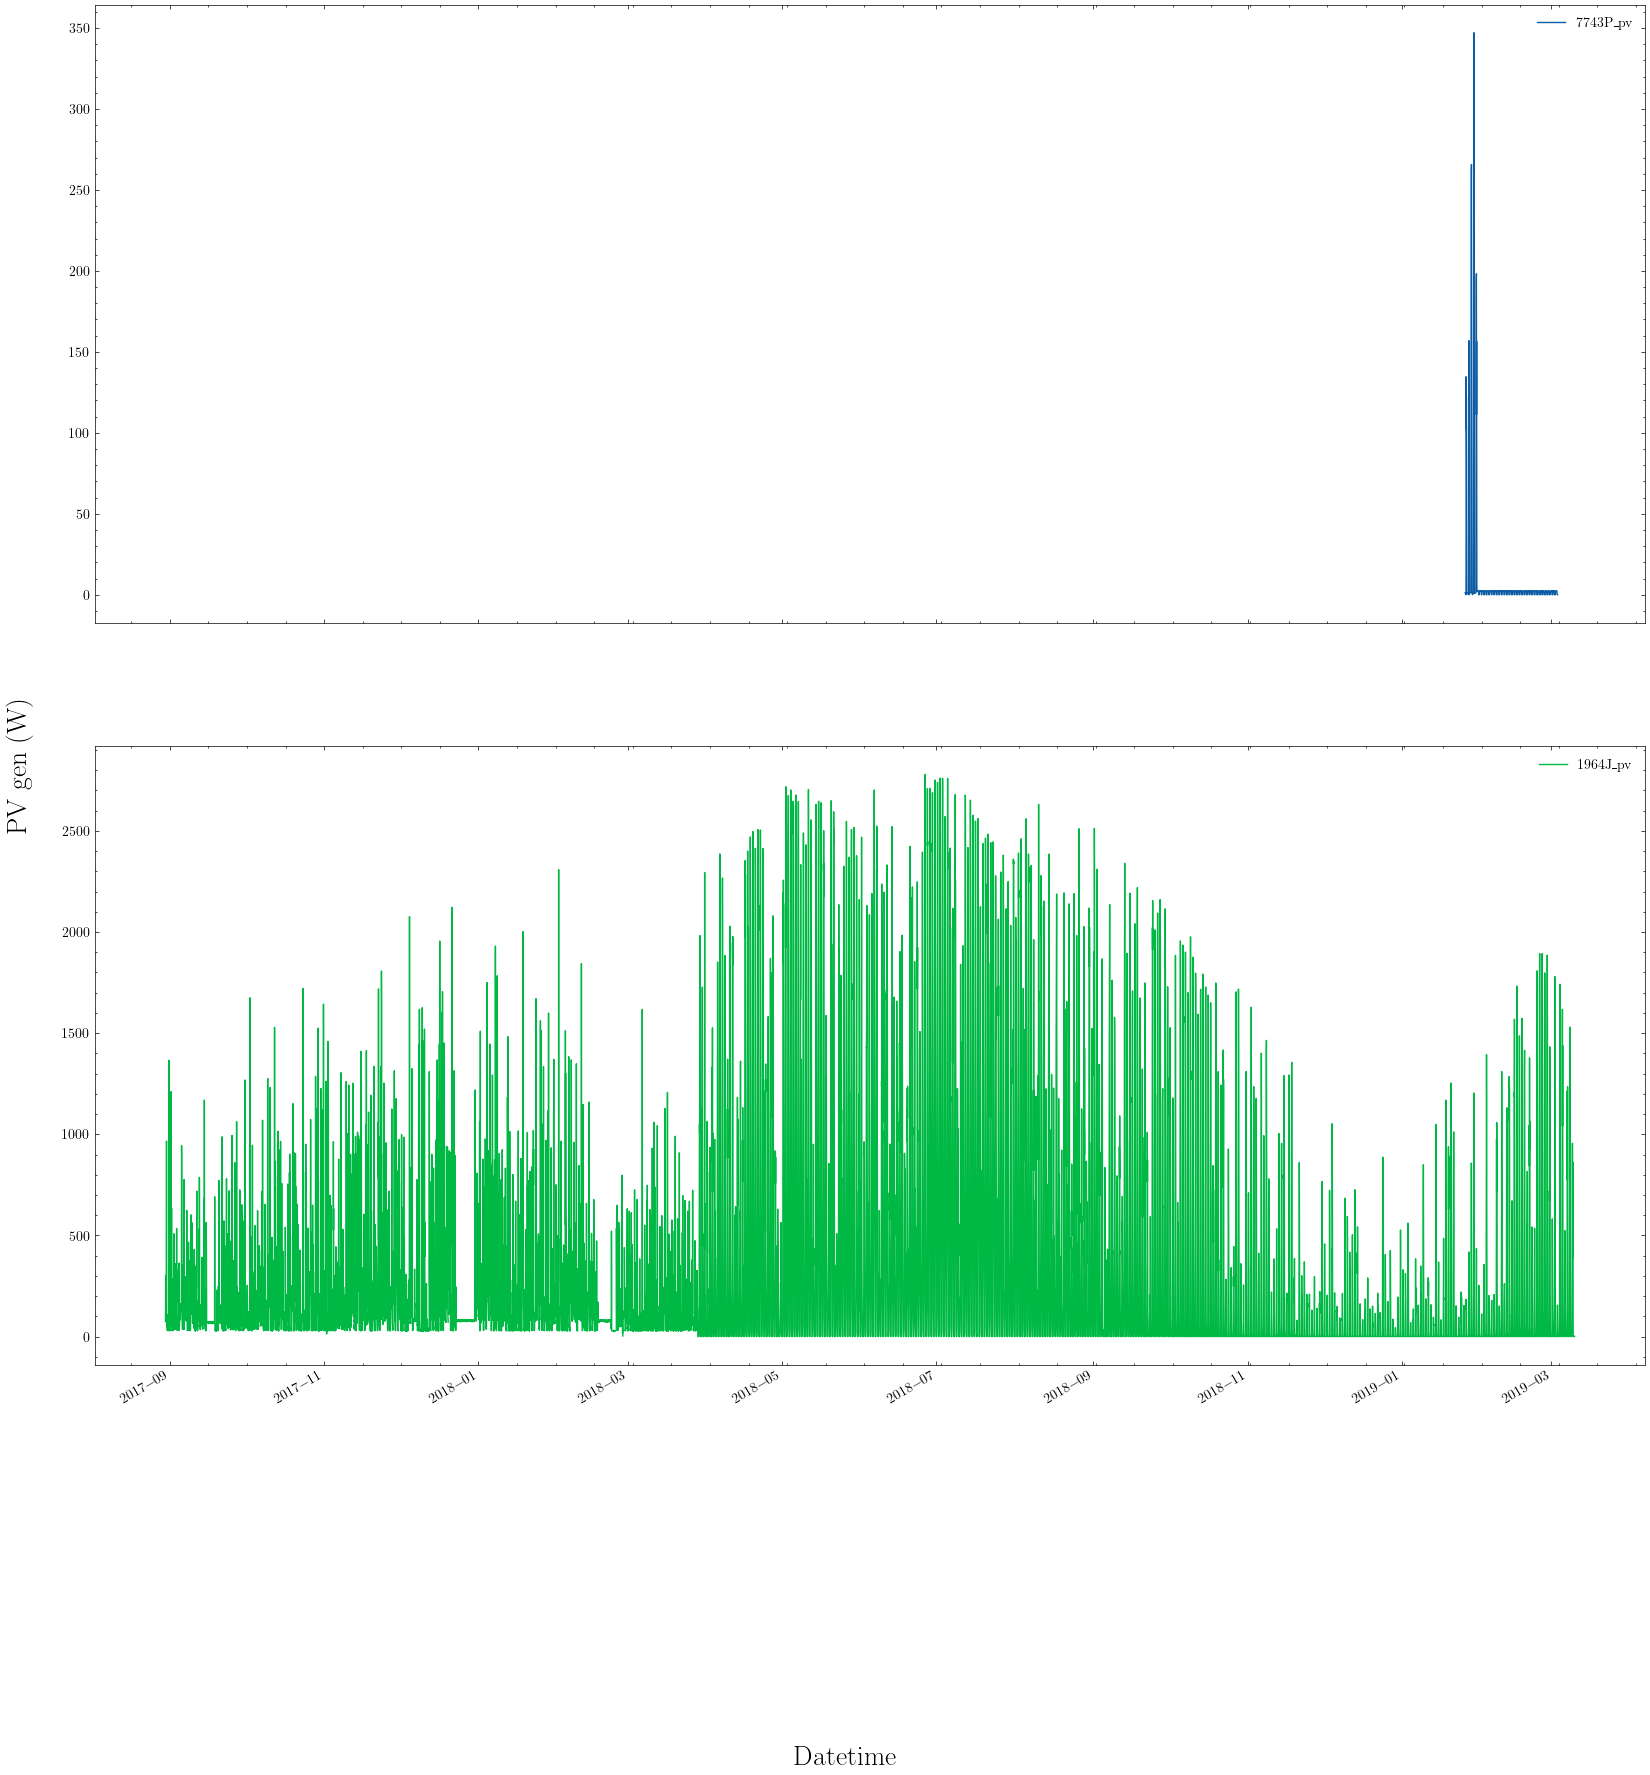

In [29]:
# plot PV generation for both 7743P and 1964J
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=[
                                    '7743P_pv', '1964J_pv'], ylabel='PV gen (W)', layout=(2, 1))

The data missing rate of 7743P is 0.948. Consider excluding it from regression.

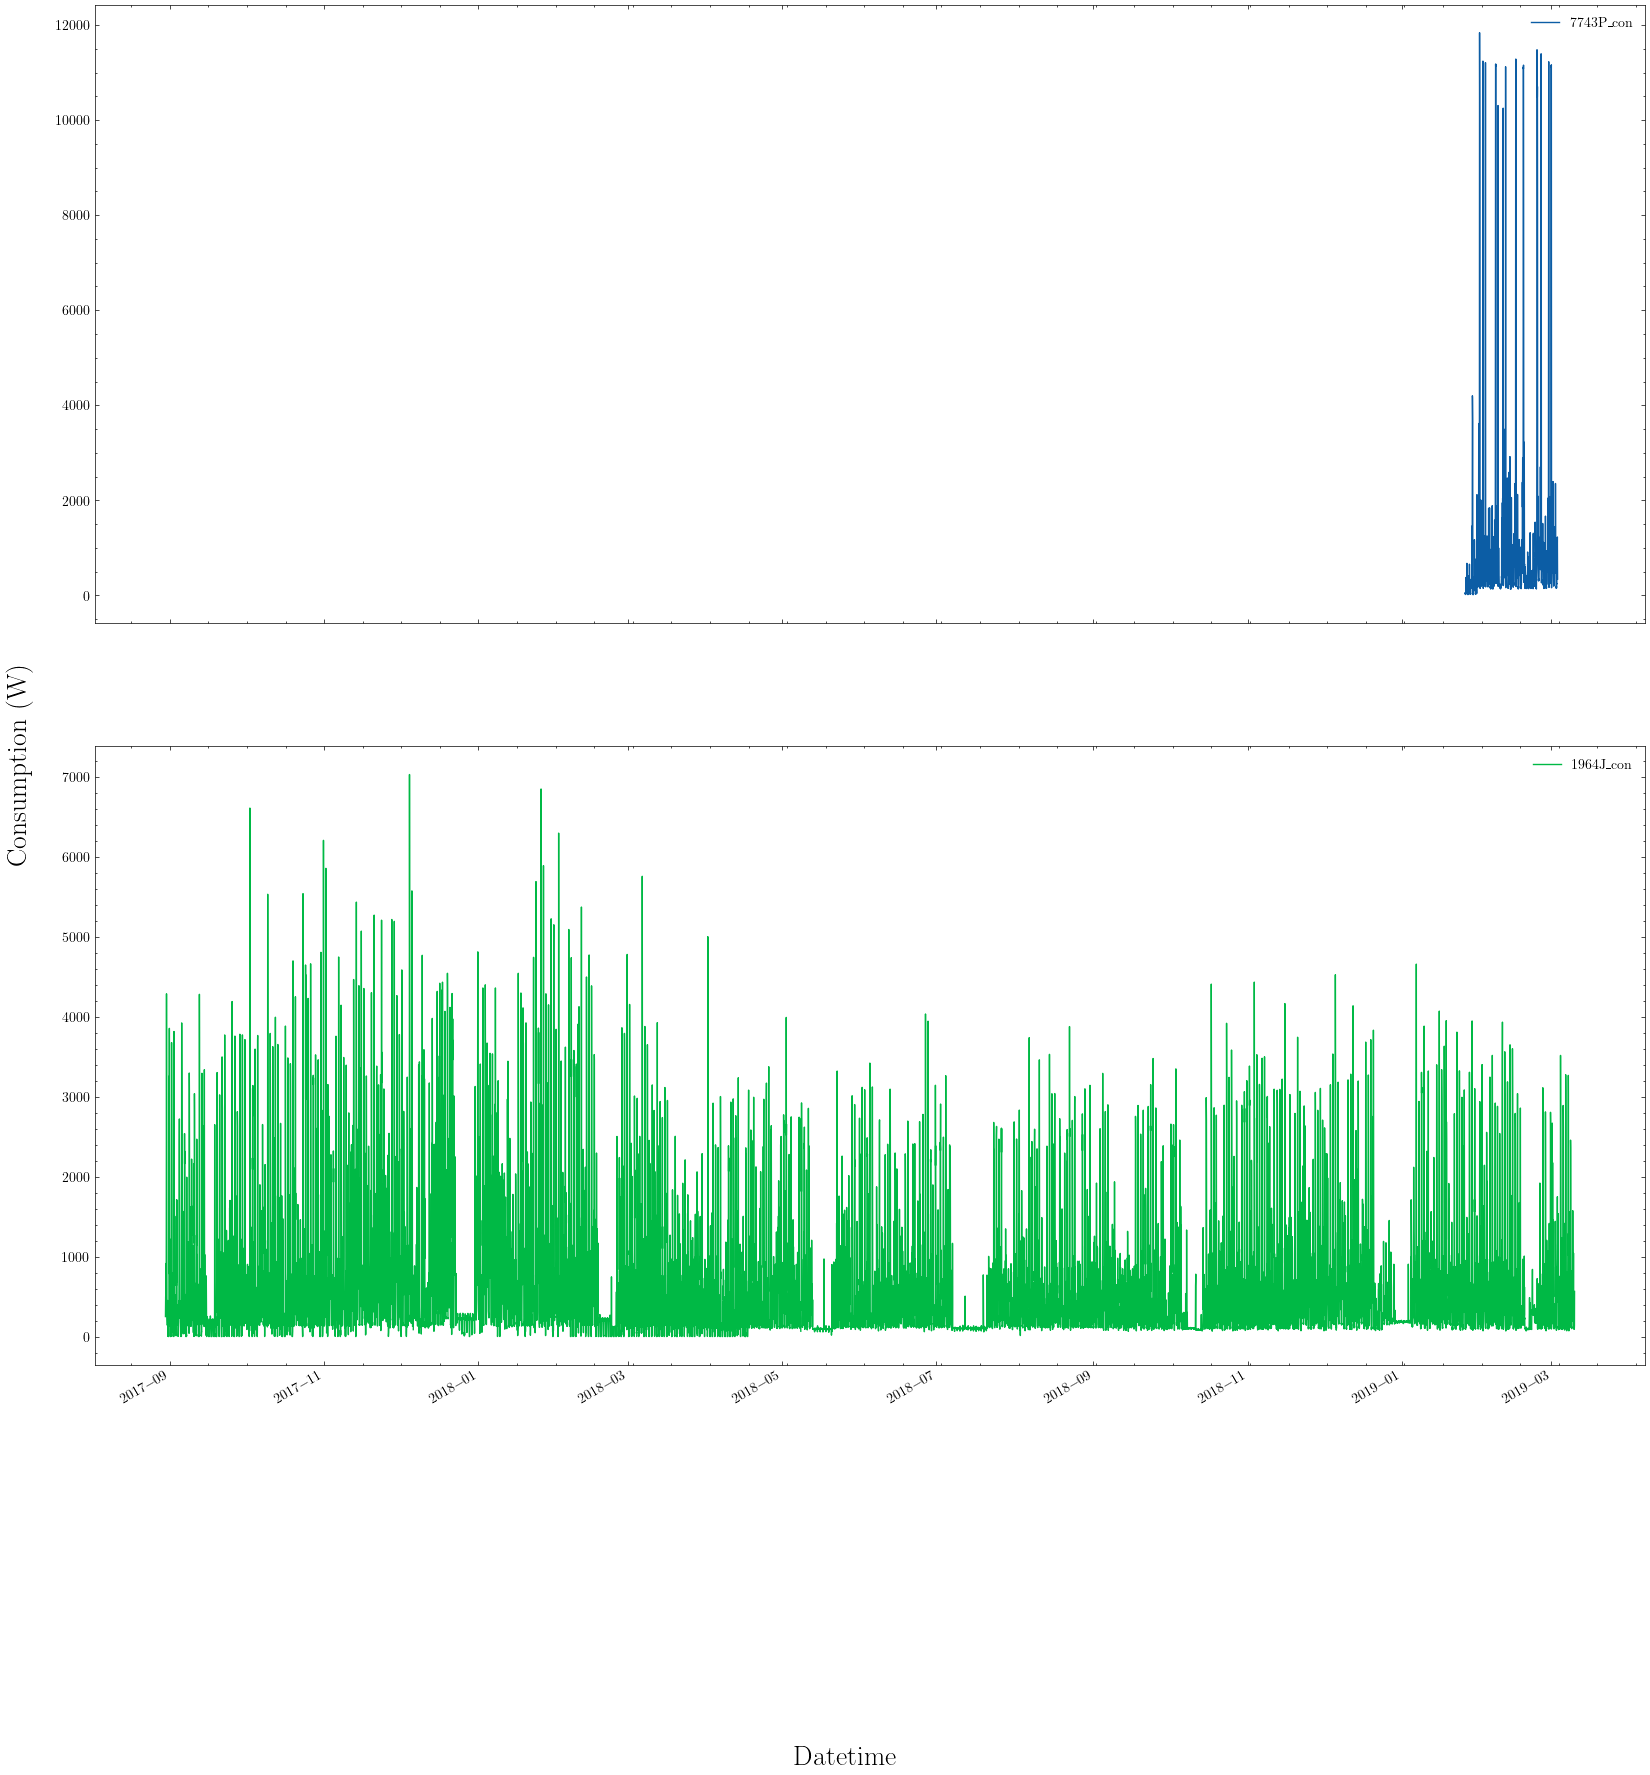

In [30]:
# plot consumption
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=[
                                    '7743P_con', '1964J_con'], ylabel='Consumption (W)', layout=(2, 1))

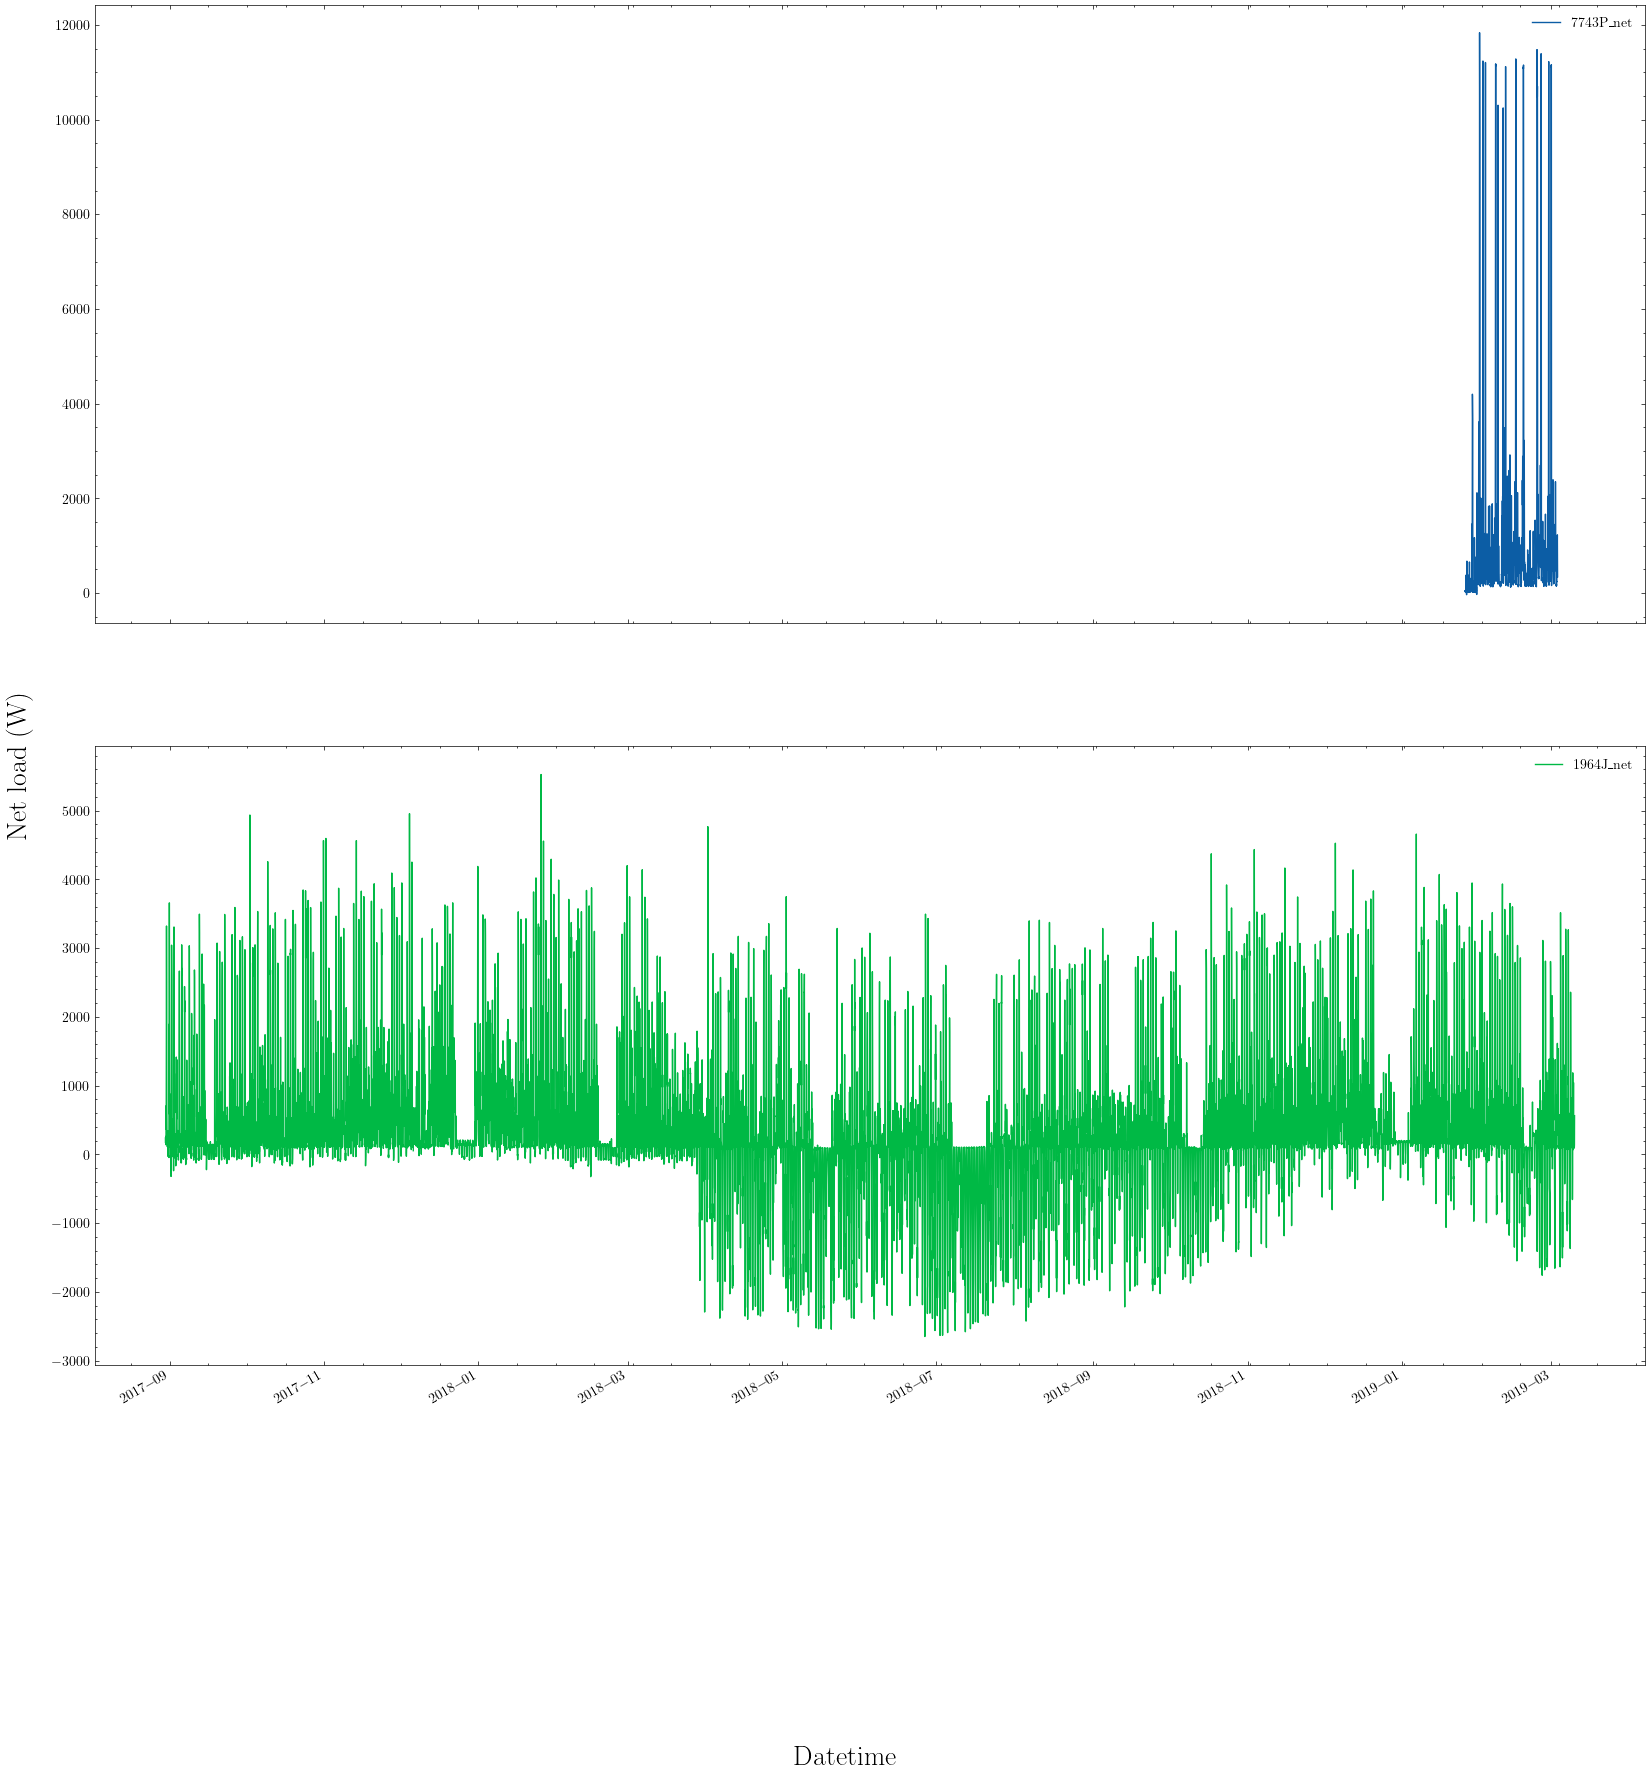

In [31]:
# Plot net load
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=[
                                    '7743P_net', '1964J_net'], ylabel='Net load (W)', layout=(2, 1))

In [32]:
# print the data missing rate of 7743P_pv
print('7743P_pv missing rate:', ams_explorer.ams_data['7743P_pv'].isnull(
).sum()/ams_explorer.ams_data.shape[0])

7743P_pv missing rate: 0.9482311320754717


##### Check 1964J
Let's check the energy profiles of 1964J with smaller time scope.

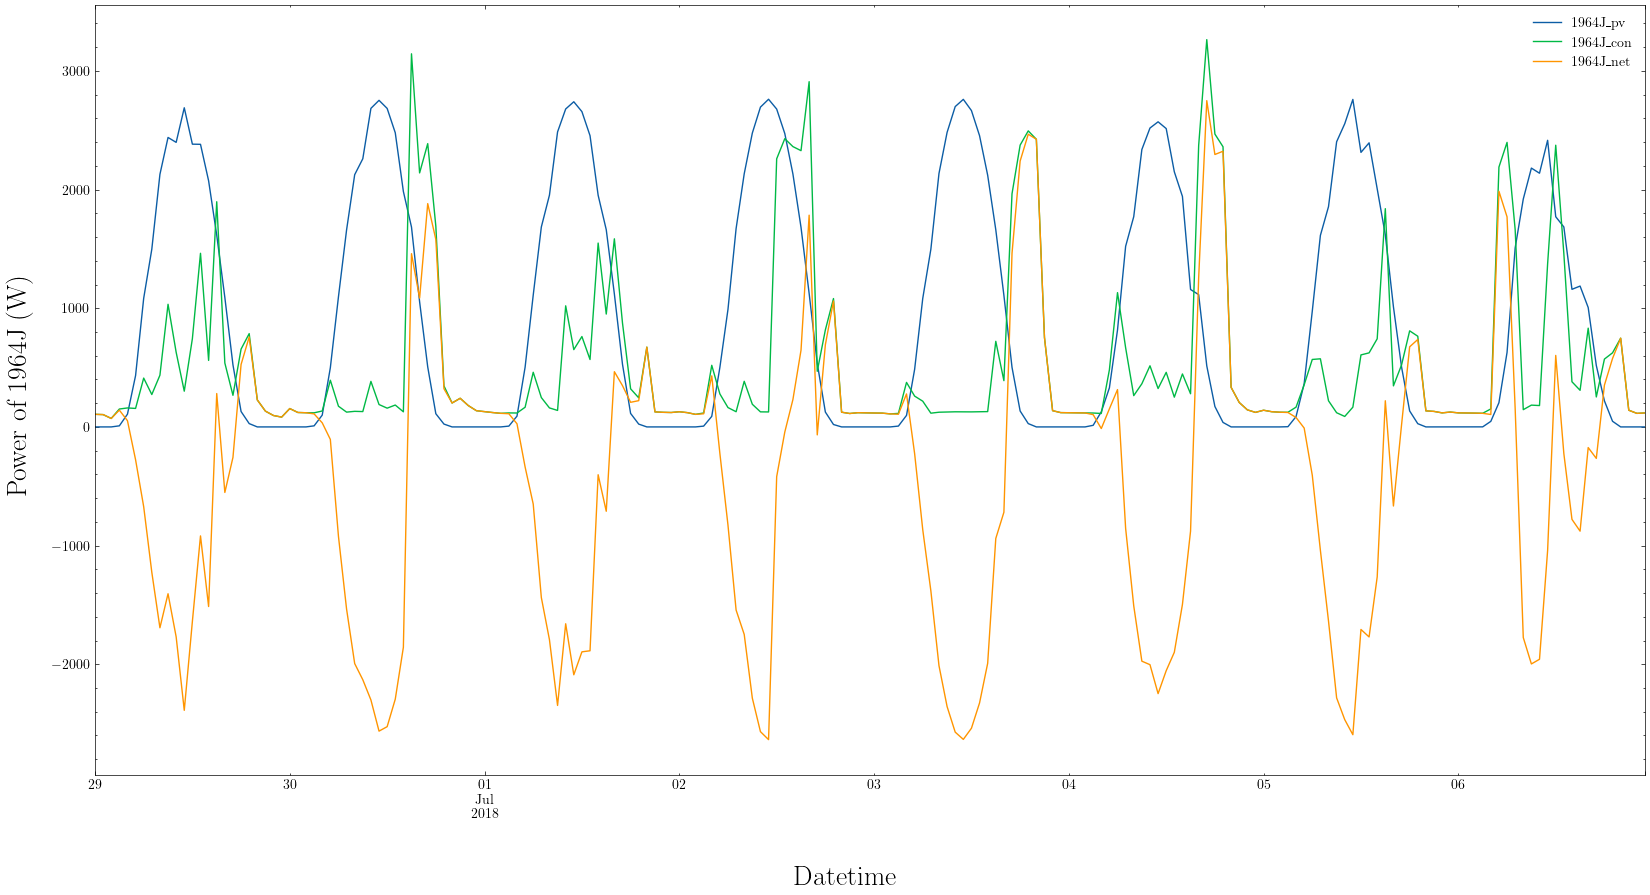

In [33]:
# Check summer days of 1964J. plot the PV generation, consumption and net load of 1964J for the 2018.06.29-2018.7.6 in a figure
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['1964J_pv', '1964J_con', '1964J_net'], year=[
                                    2018], doy_start=180, doy_end=187, ylabel='Power of 1964J (W)', layout=(1, 1), figsize=(20, 10), subplots=False)

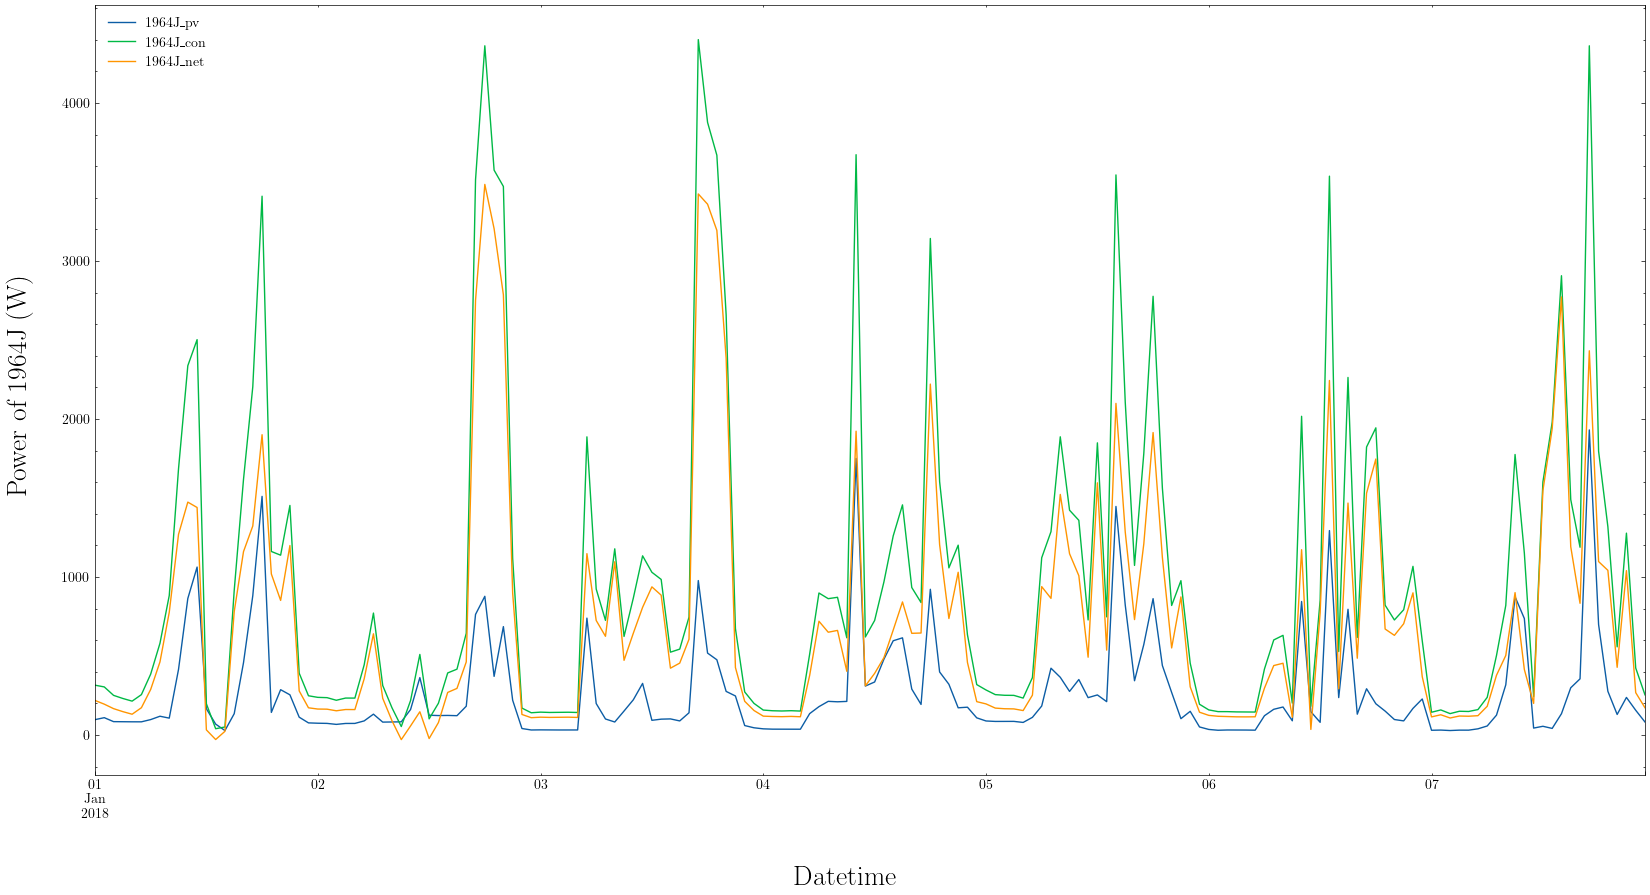

In [34]:
# Check winter days of 1964J. plot the PV generation, consumption and net load of 1964J for the 2018.1.1-2018.1.7 in a figure
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['1964J_pv', '1964J_con', '1964J_net'], year=[
                                    2018], doy_start=1, doy_end=7, ylabel='Power of 1964J (W)', layout=(1, 1), figsize=(20, 10), subplots=False)

#### Plot buildings with heat pumps
| Code  | City  | HH tot | Type  | Area (m^2)  | kWp installed of PV system  | Remarks  |
|---|---|---|---|---|---|---|
| 9991J  | AMS  | 2  | Boathouse  | > 130  | 8.4  | Heat pumps  |
| 4451M  | AMS  | 4  | Boathouse  | > 130  | 6.9  | Heat pumps  |

First, compare the energy profiles of 9991J and 4451M side by side.

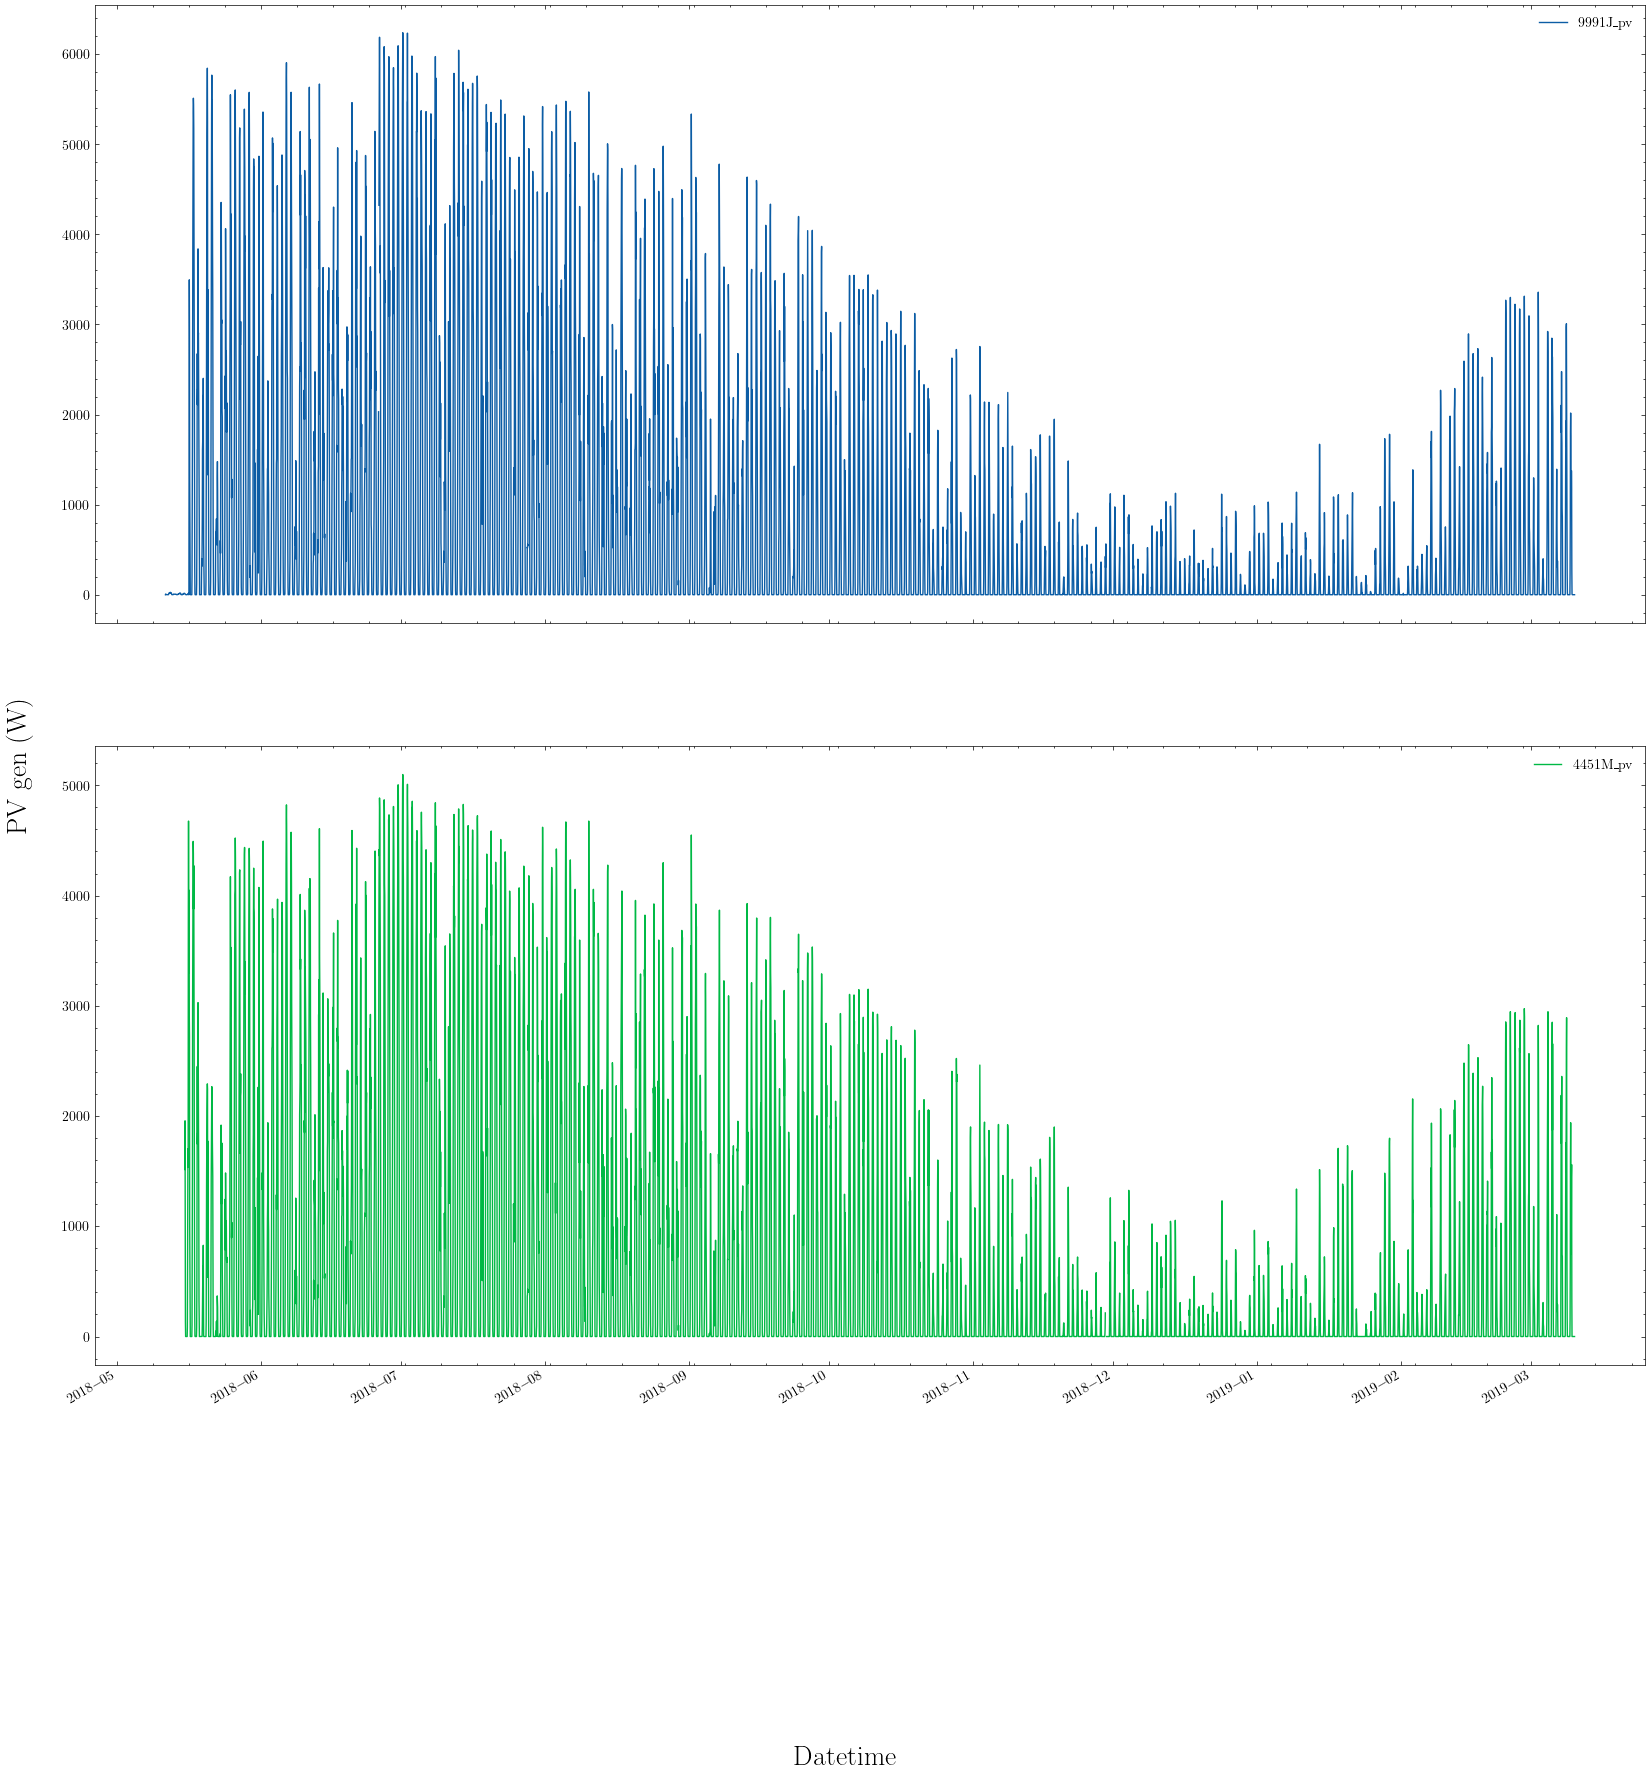

In [35]:
# plot PV generation for both 9991J and 4451M
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=[
                                    '9991J_pv', '4451M_pv'], ylabel='PV gen (W)', layout=(2, 1))

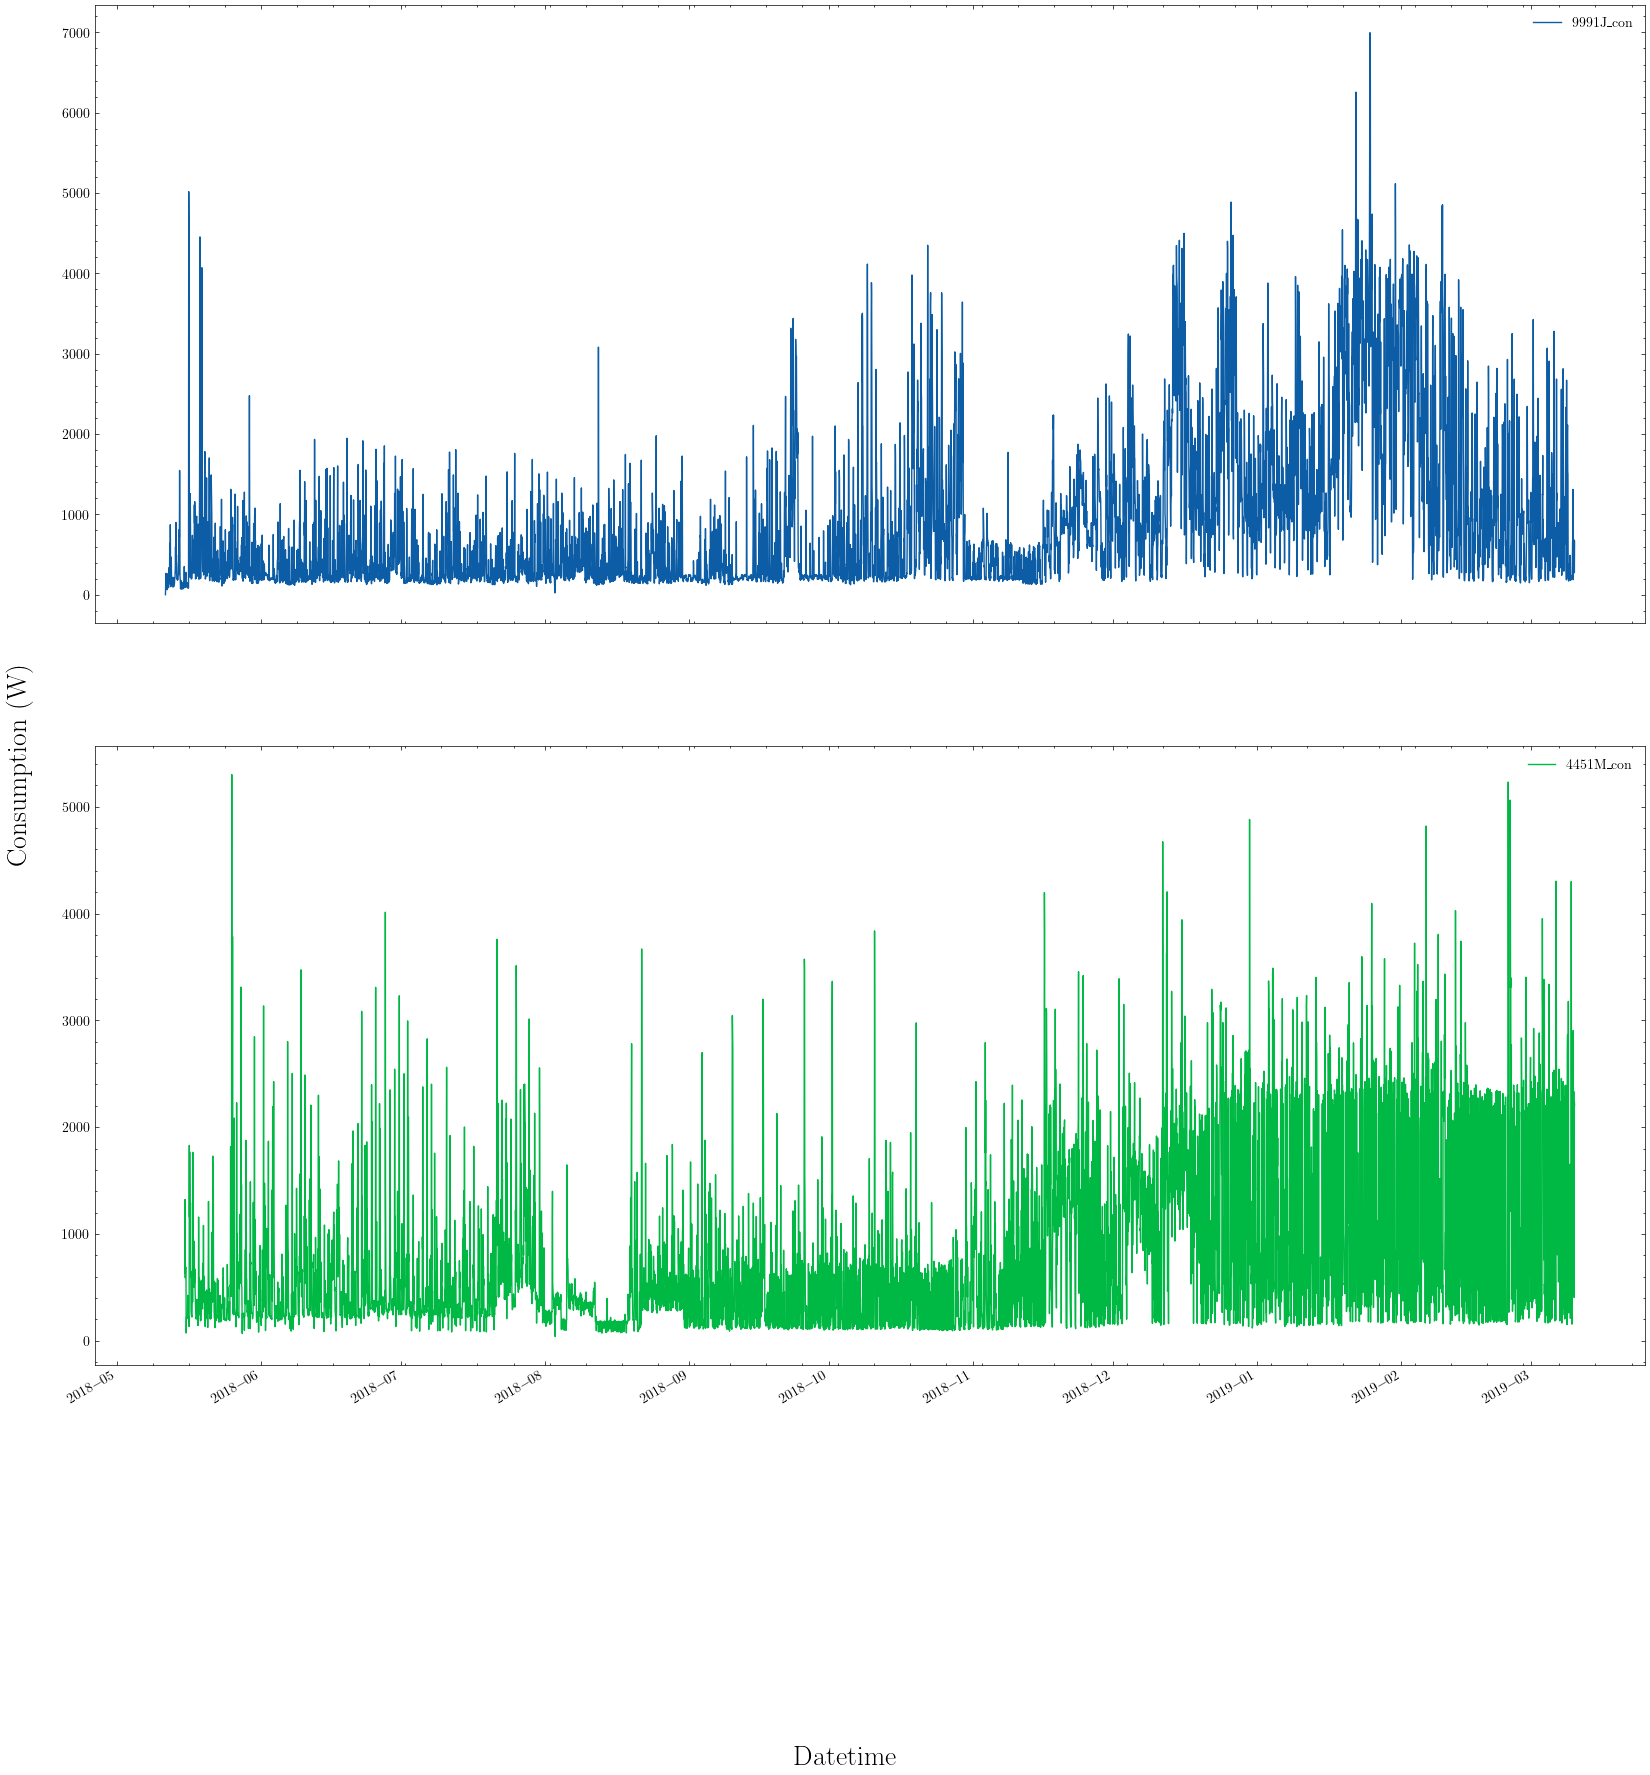

In [36]:
# plot consumption for both 9991J and 4451M
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=[
                                    '9991J_con', '4451M_con'], ylabel='Consumption (W)', layout=(2, 1))

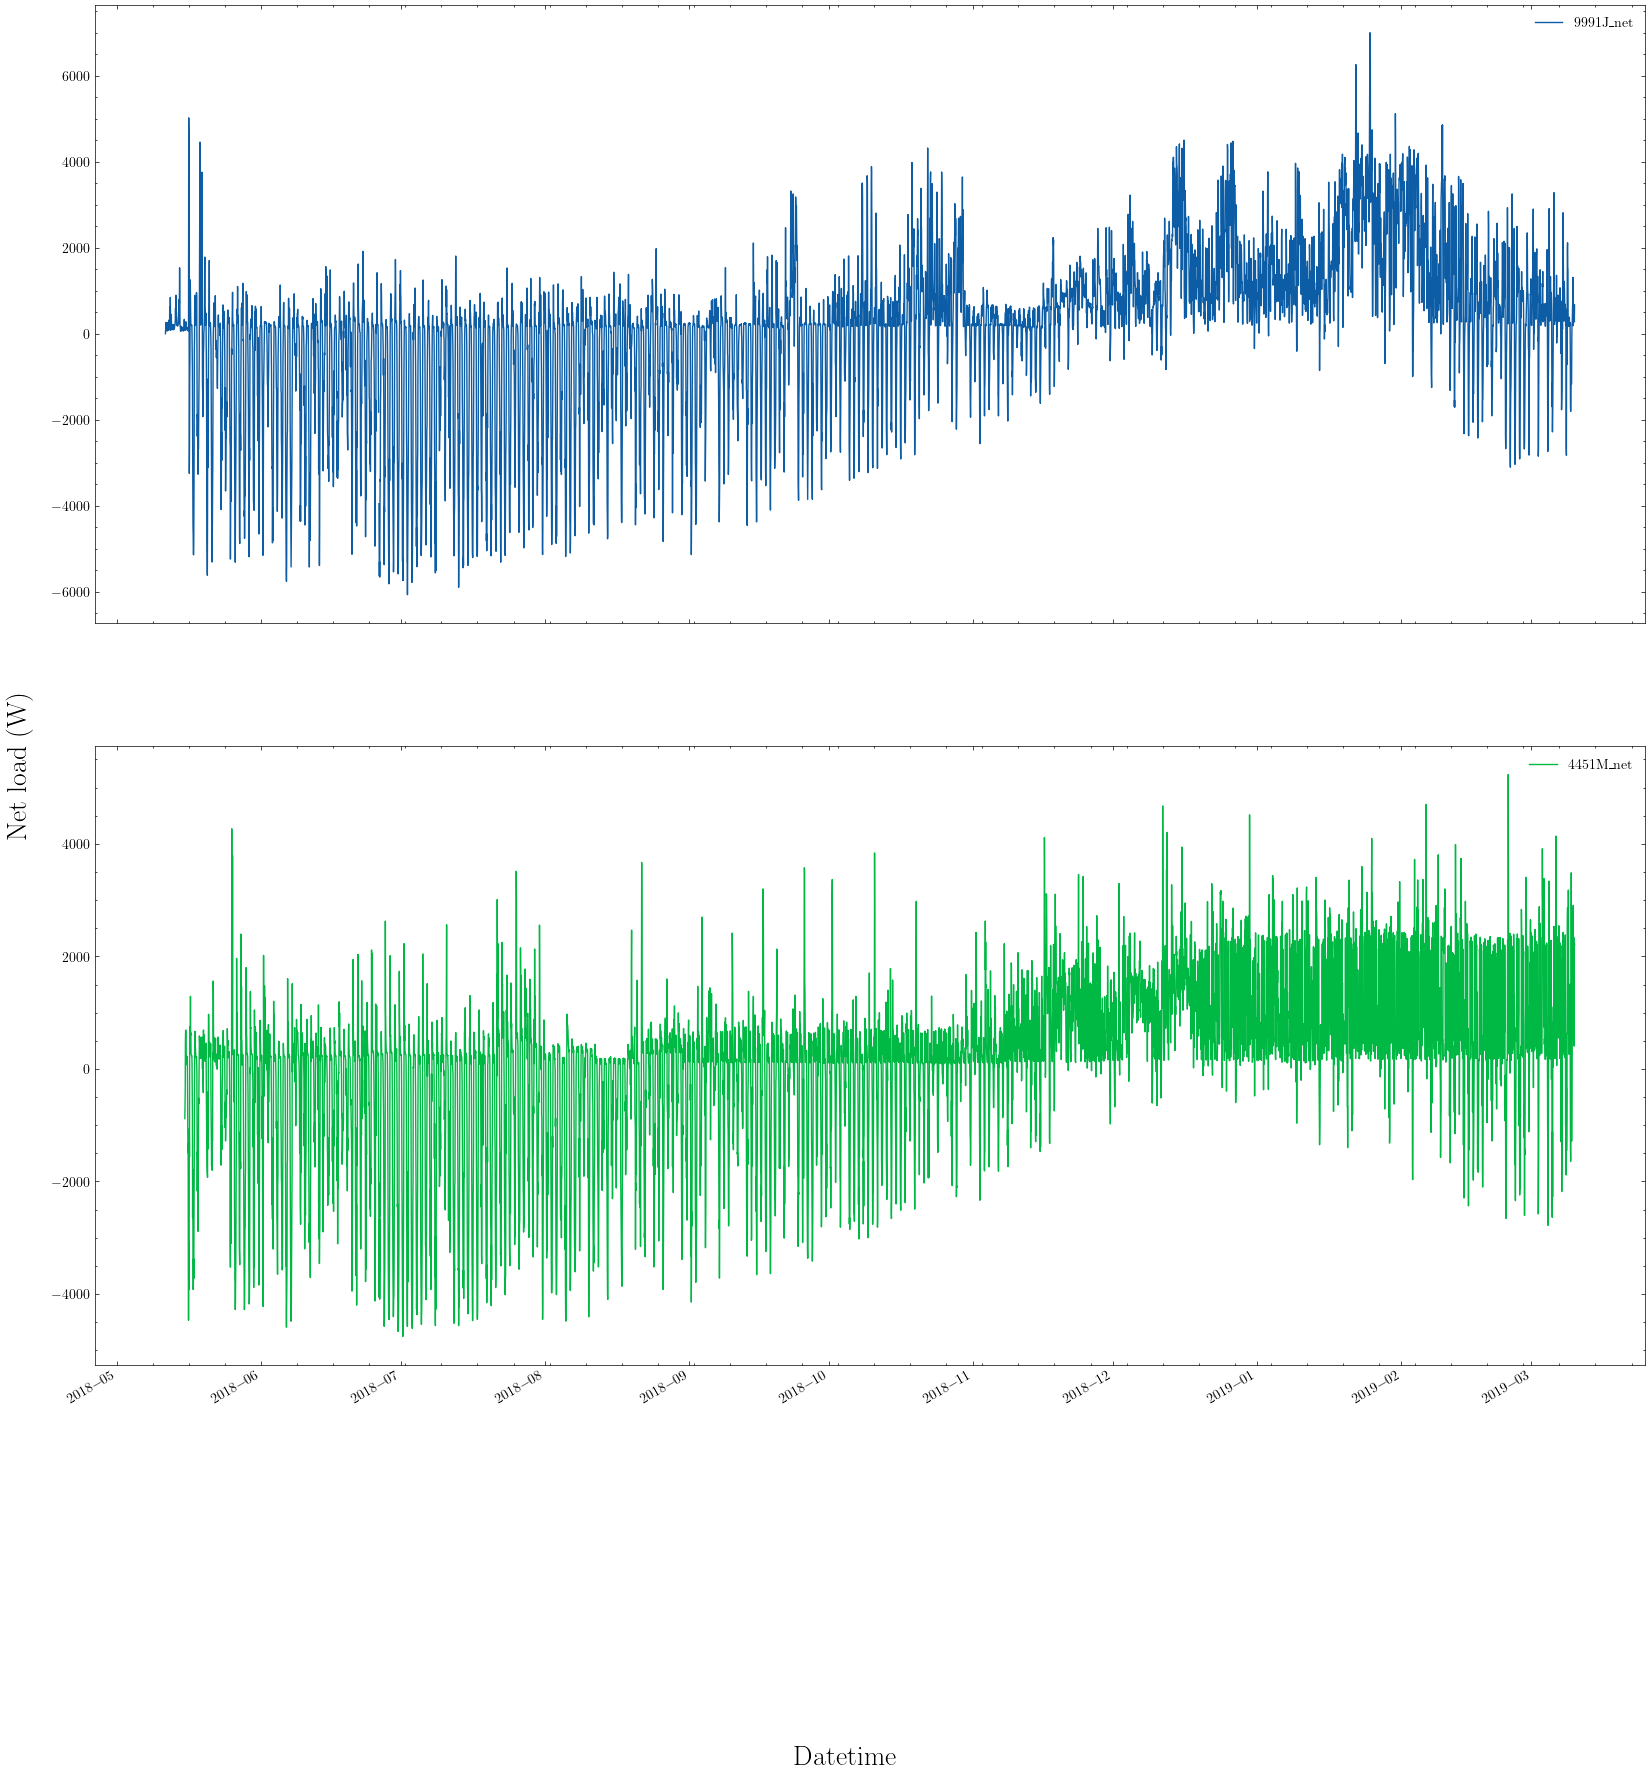

In [37]:
# Plot net load for both 9991J and 4451M
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=[
                                    '9991J_net', '4451M_net'], ylabel='Net load (W)', layout=(2, 1))

##### Check 9991J
Let's check the energy profiles of 9991J with smaller time scope.

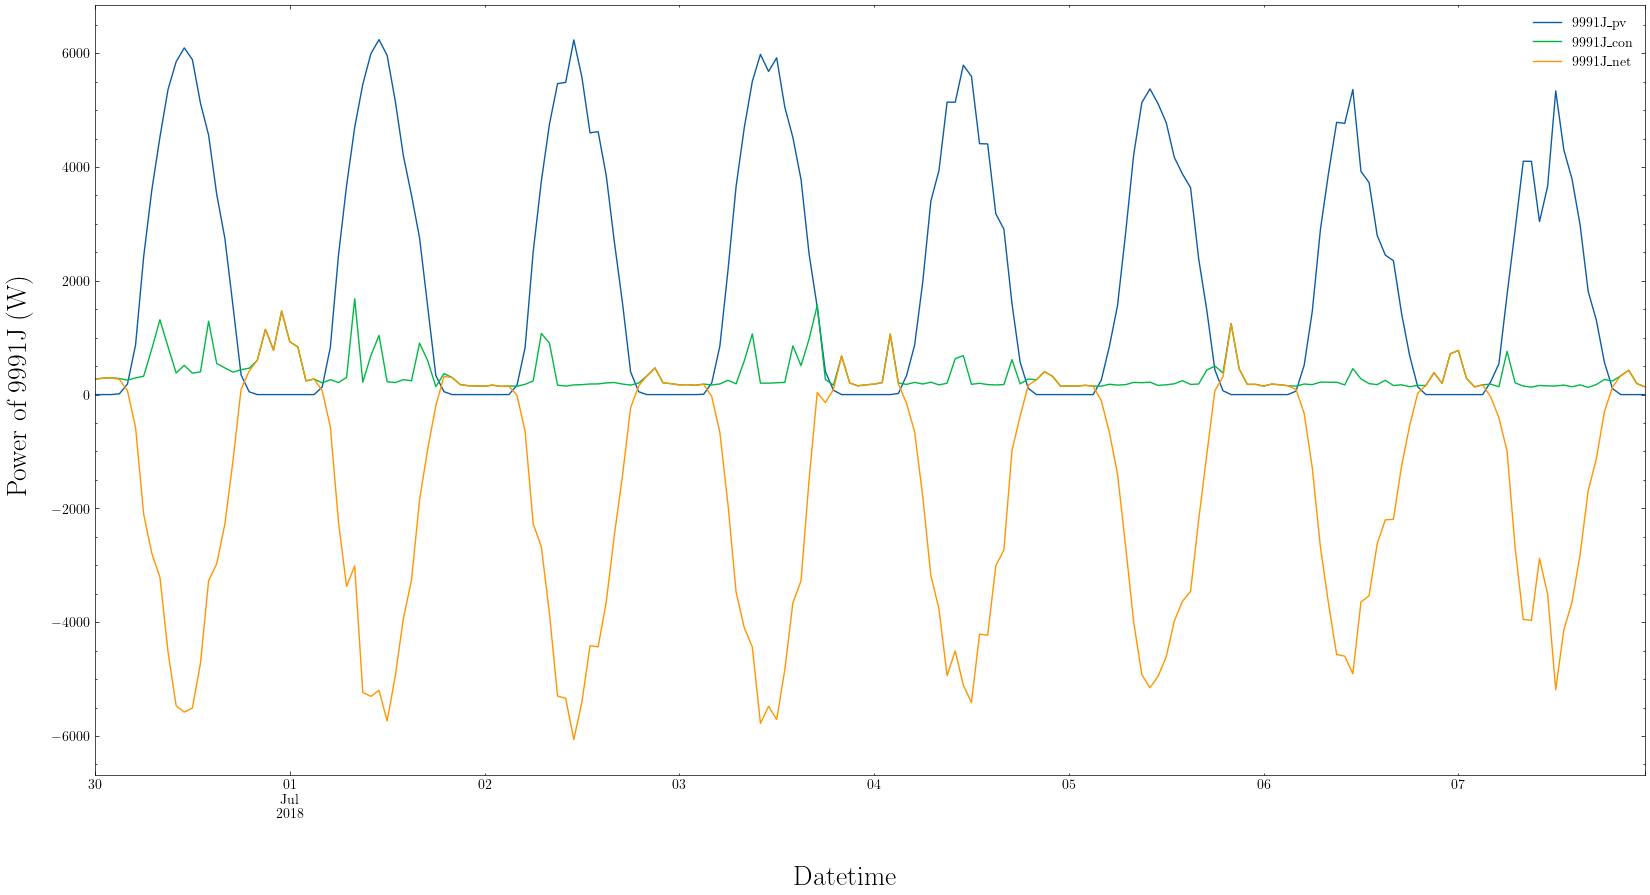

In [38]:
# Check summer days of 9991J. Plot the PV generation, consumption and net load of 9991J for the 2018.06.30-2018.07.07 in one figure
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['9991J_pv', '9991J_con', '9991J_net'], year=[
                                    2018], doy_start=181, doy_end=188, ylabel='Power of 9991J (W)', layout=(1, 1), figsize=(20, 10), subplots=False)

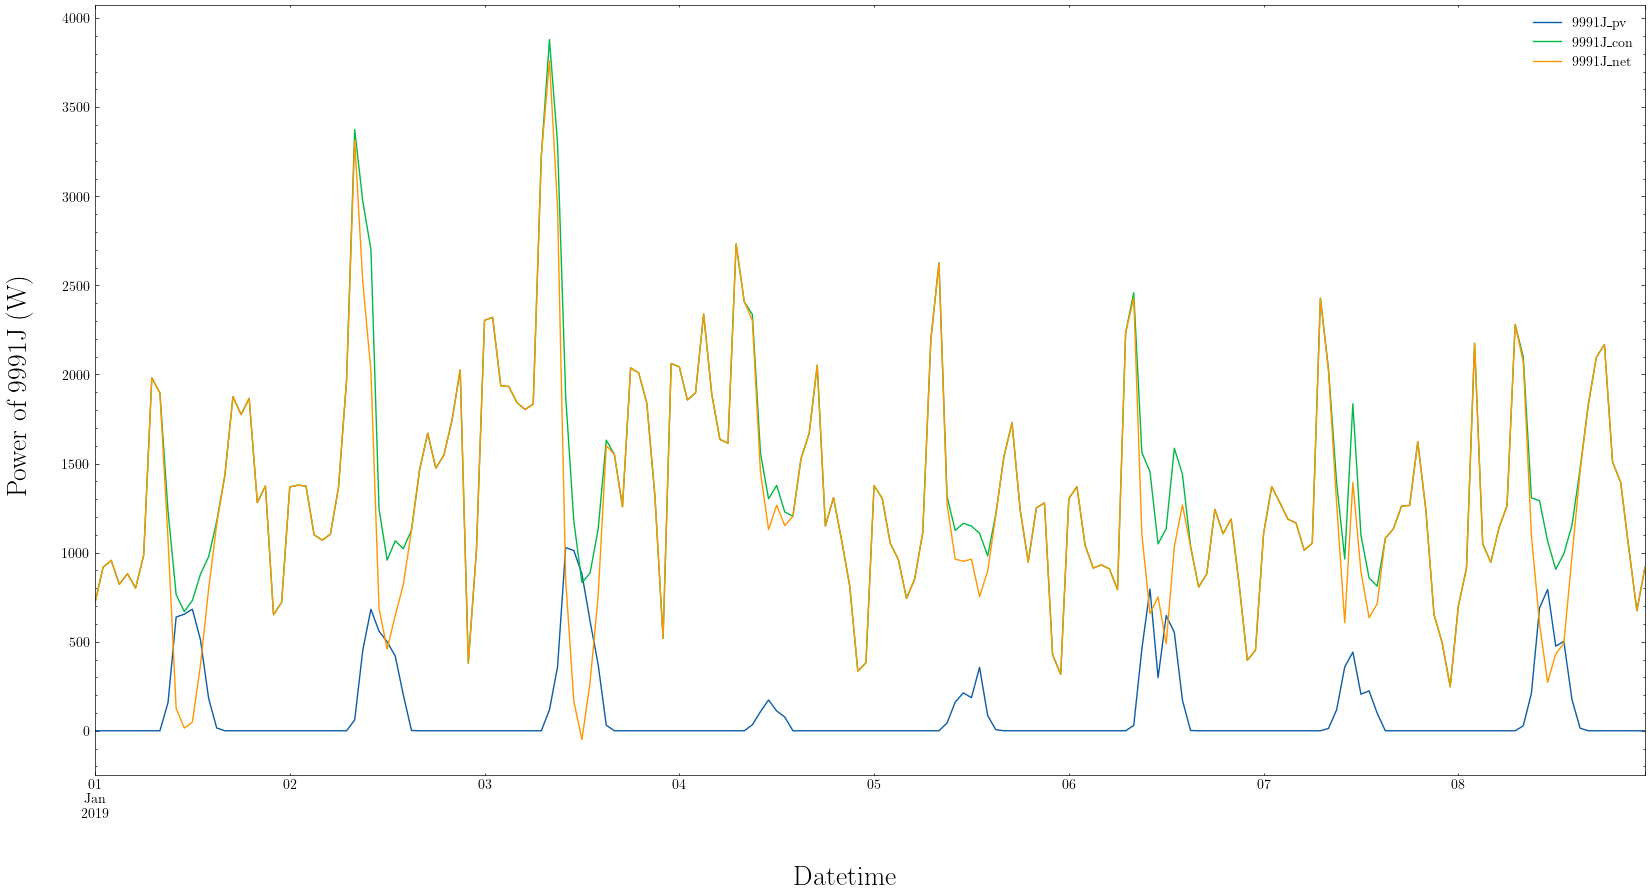

In [39]:
# check winter days of 9991J. Plot the PV generation, consumption and net load of 9991J for the 2019.1.1-2019.1.7 in one figure
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['9991J_pv', '9991J_con', '9991J_net'], year=[
                                    2019], doy_start=1, doy_end=8, ylabel='Power of 9991J (W)', layout=(1, 1), figsize=(20, 10), subplots=False)

##### Check 4451M

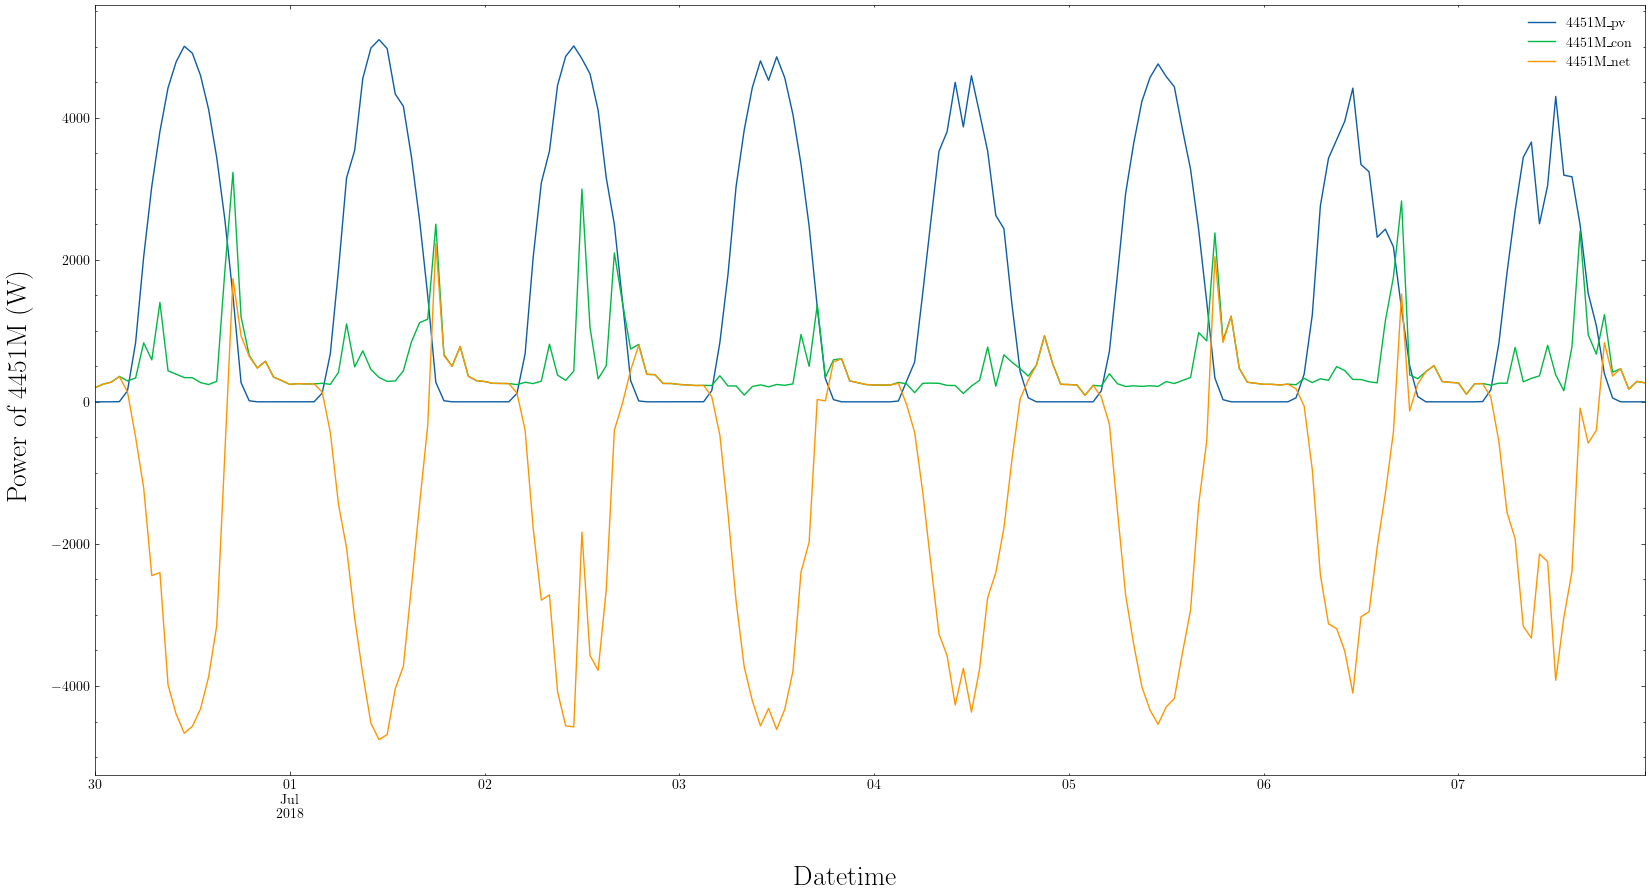

In [40]:
# Check summer days of 4451M. Plot the PV generation, consumption and net load of 4451M for the 2018.06.30-2018.07.07 in a figure
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['4451M_pv', '4451M_con', '4451M_net'], year=[
                                    2018], doy_start=181, doy_end=188, ylabel='Power of 4451M (W)', layout=(1, 1), figsize=(20, 10), subplots=False)

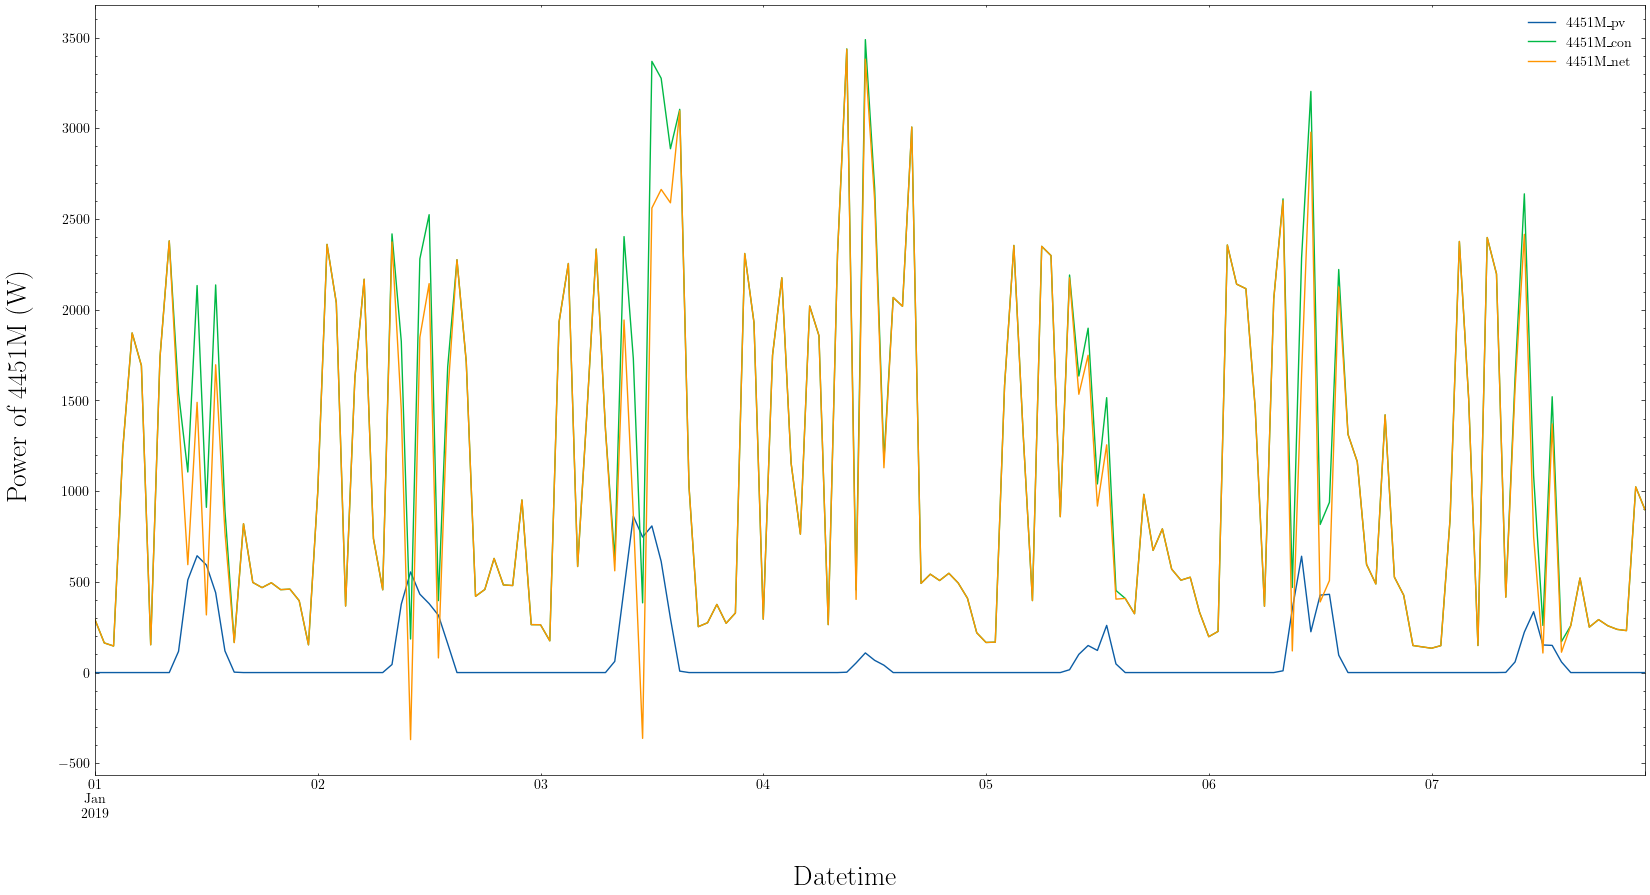

In [41]:
# Check winter days of 9991J. Plot the PV generation, consumption and net load of 9991J for the 2019.1.1-2019.1.7 in a figure
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['4451M_pv', '4451M_con', '4451M_net'], year=[
                                    2019], doy_start=1, doy_end=7, ylabel='Power of 4451M (W)', layout=(1, 1), figsize=(20, 10), subplots=False)

####  Plot the building all electric

| Code  | City  | HH tot | Type  | Area (m^2)  | kWp installed of PV system  | Remarks  |
|---|---|---|---|---|---|---|
| 4226R  | AMS  | 2  | Boathouse  | > 130  | 3.85  | All electric (including heating)  |

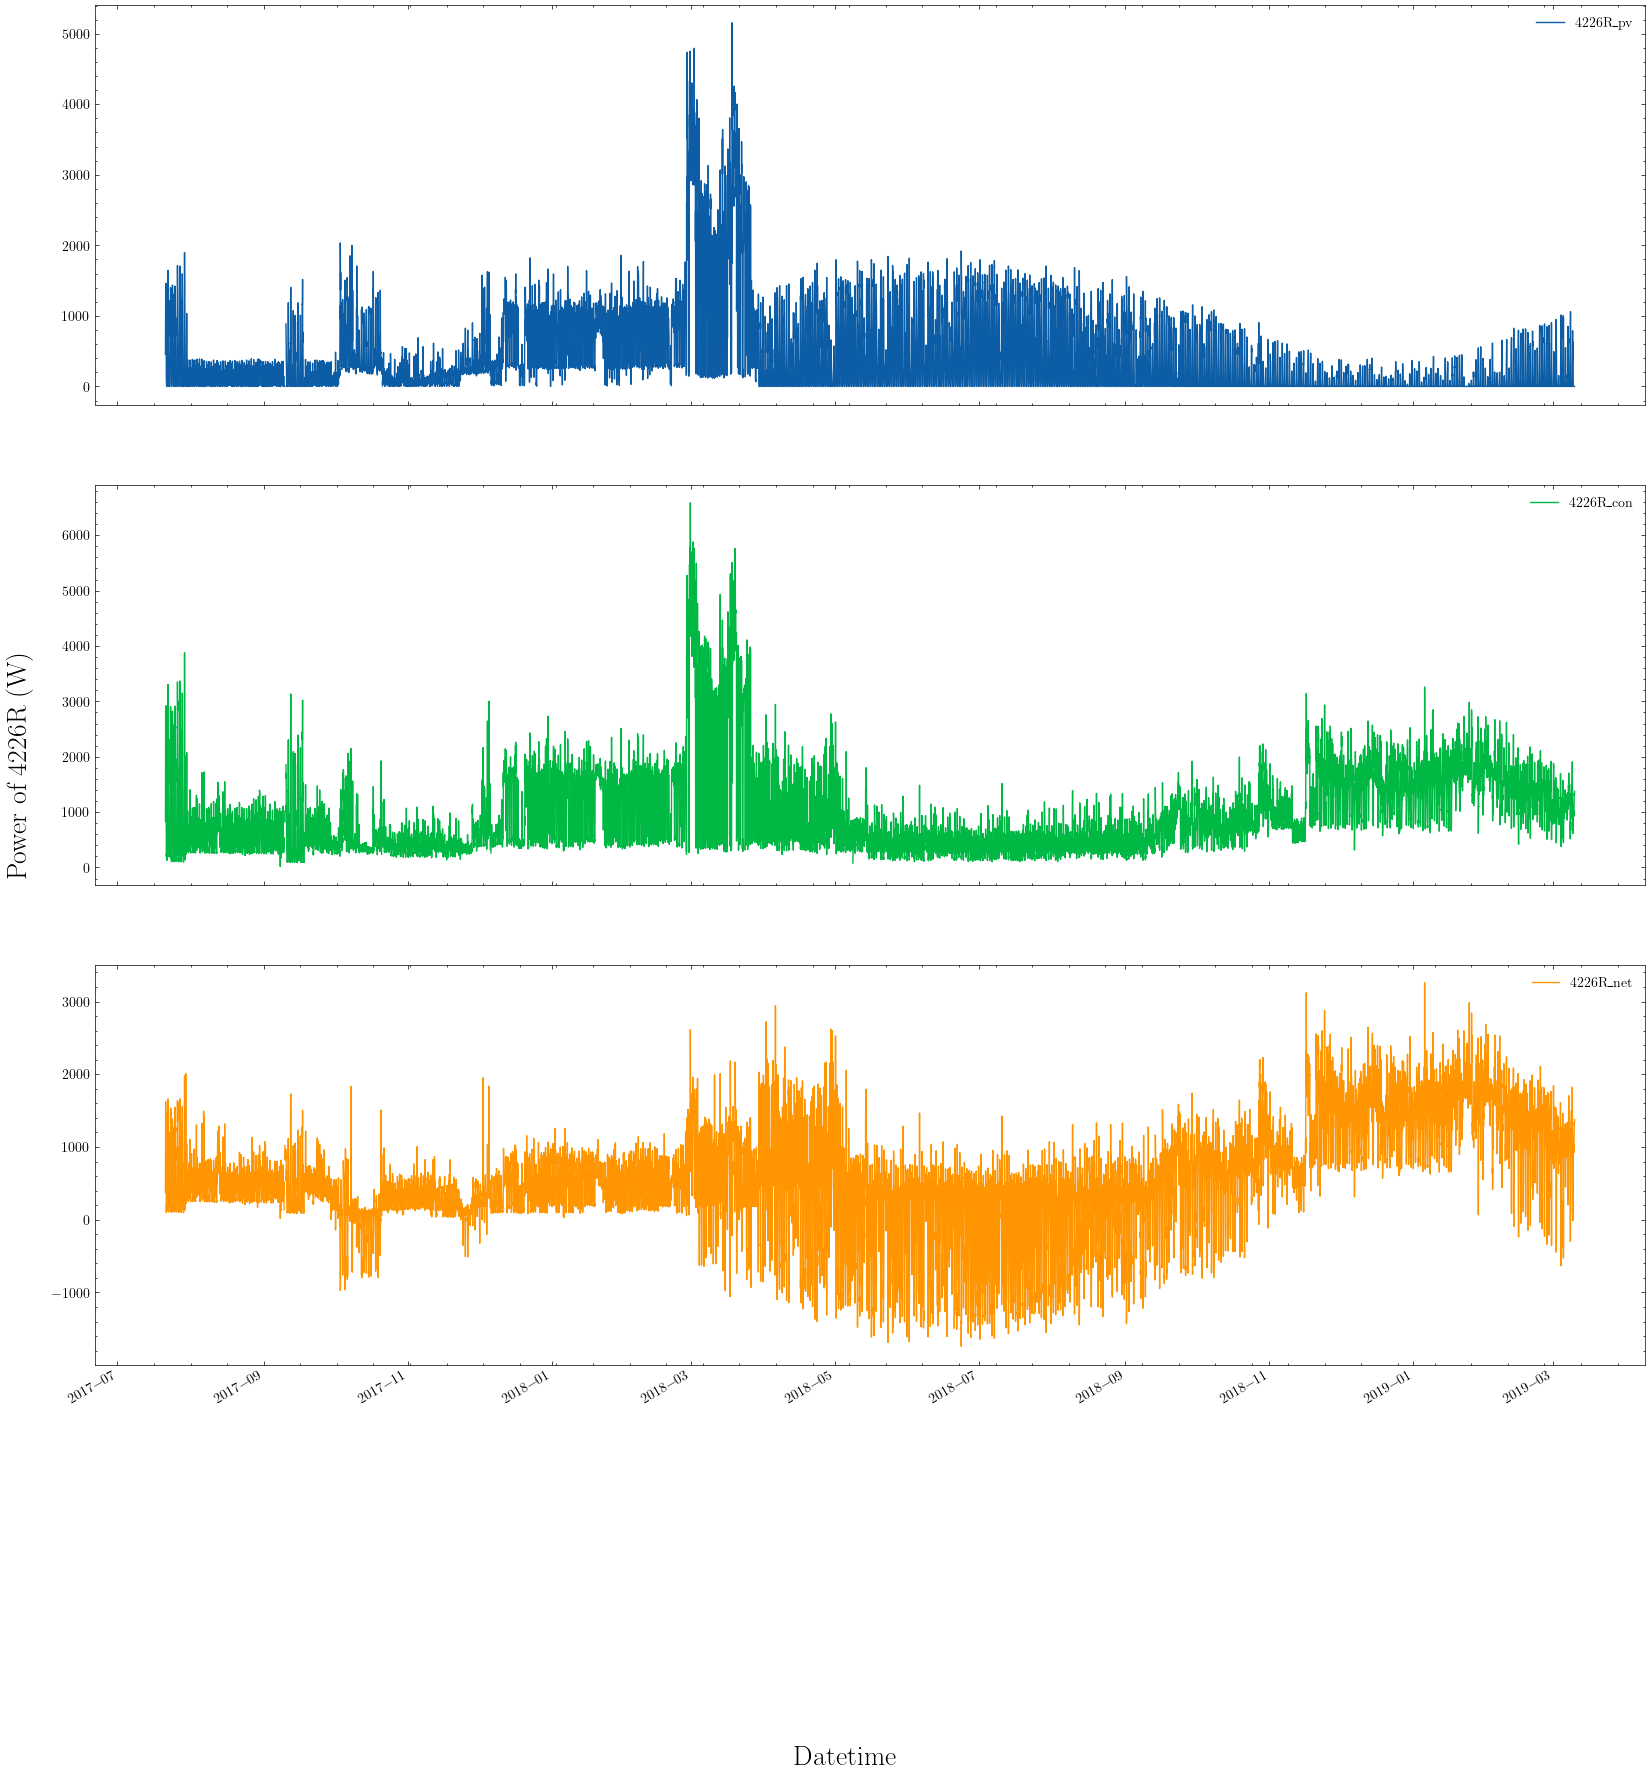

In [42]:
# plot PV,con,and net load for 4226R
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=[
                                    '4226R_pv', '4226R_con', '4226R_net'], ylabel='Power of 4226R (W)', layout=(3, 1))

The PV generation around 2018-03-10 is weird. The peak power is around 5000W but the installed capacity according to the label is 3.85kWp!

Let's check the energy profiles of 9991J with smaller time scope

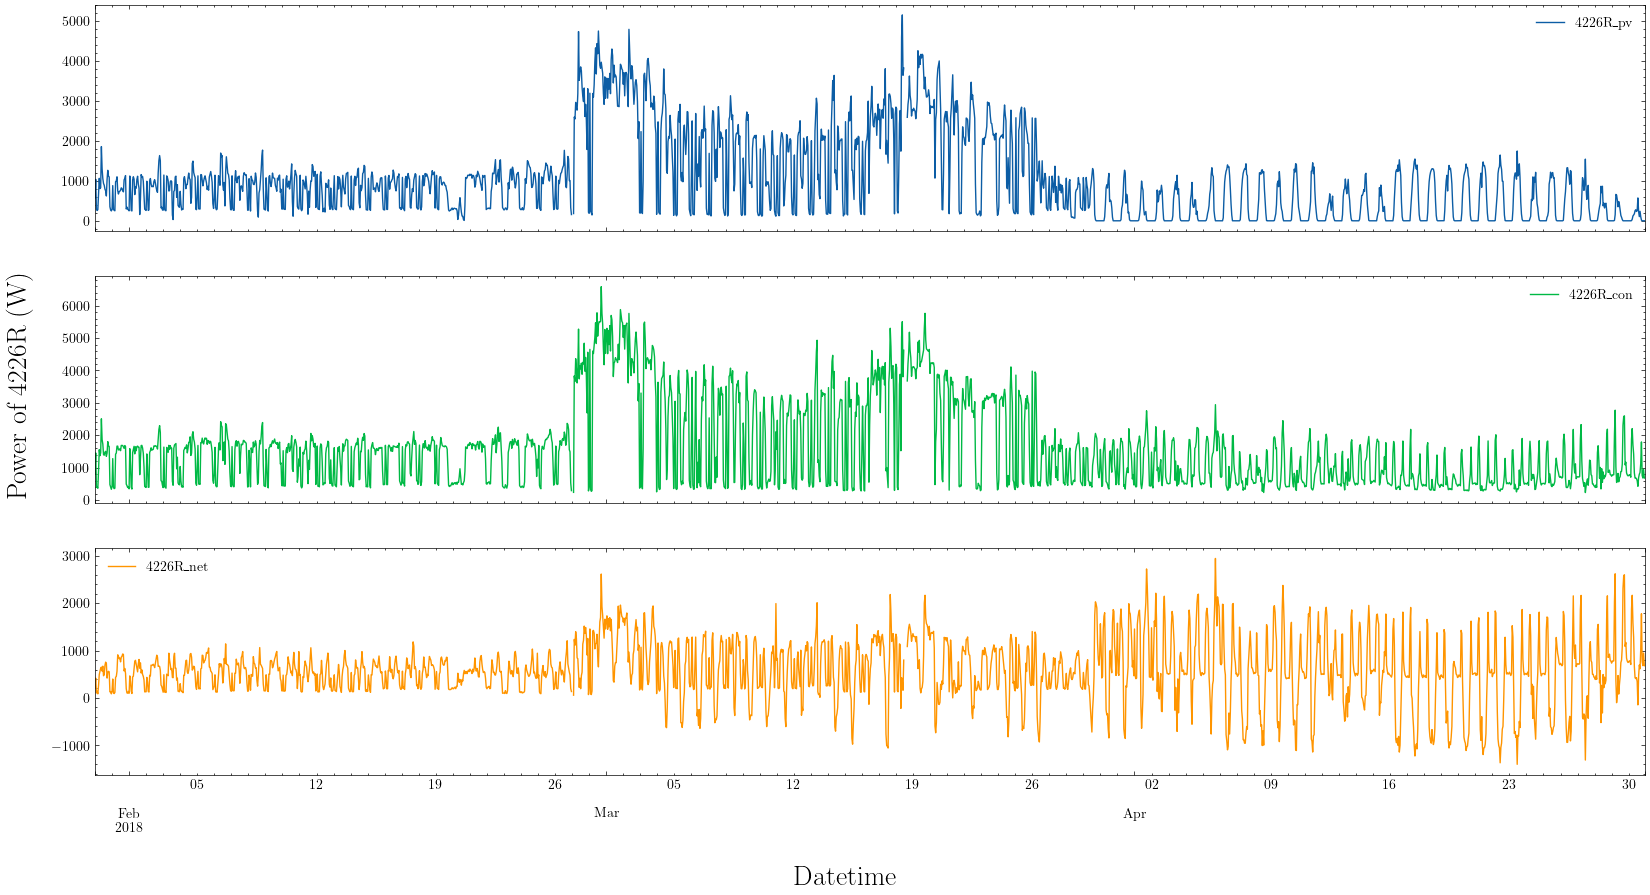

In [43]:
# check the data of 4426R in Jan, Feb and Mar 2018
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['4226R_pv', '4226R_con', '4226R_net'], year=[
                                    2018], doy_start=30, doy_end=120, ylabel='Power of 4226R (W)', layout=(3, 1), figsize=(20, 10))

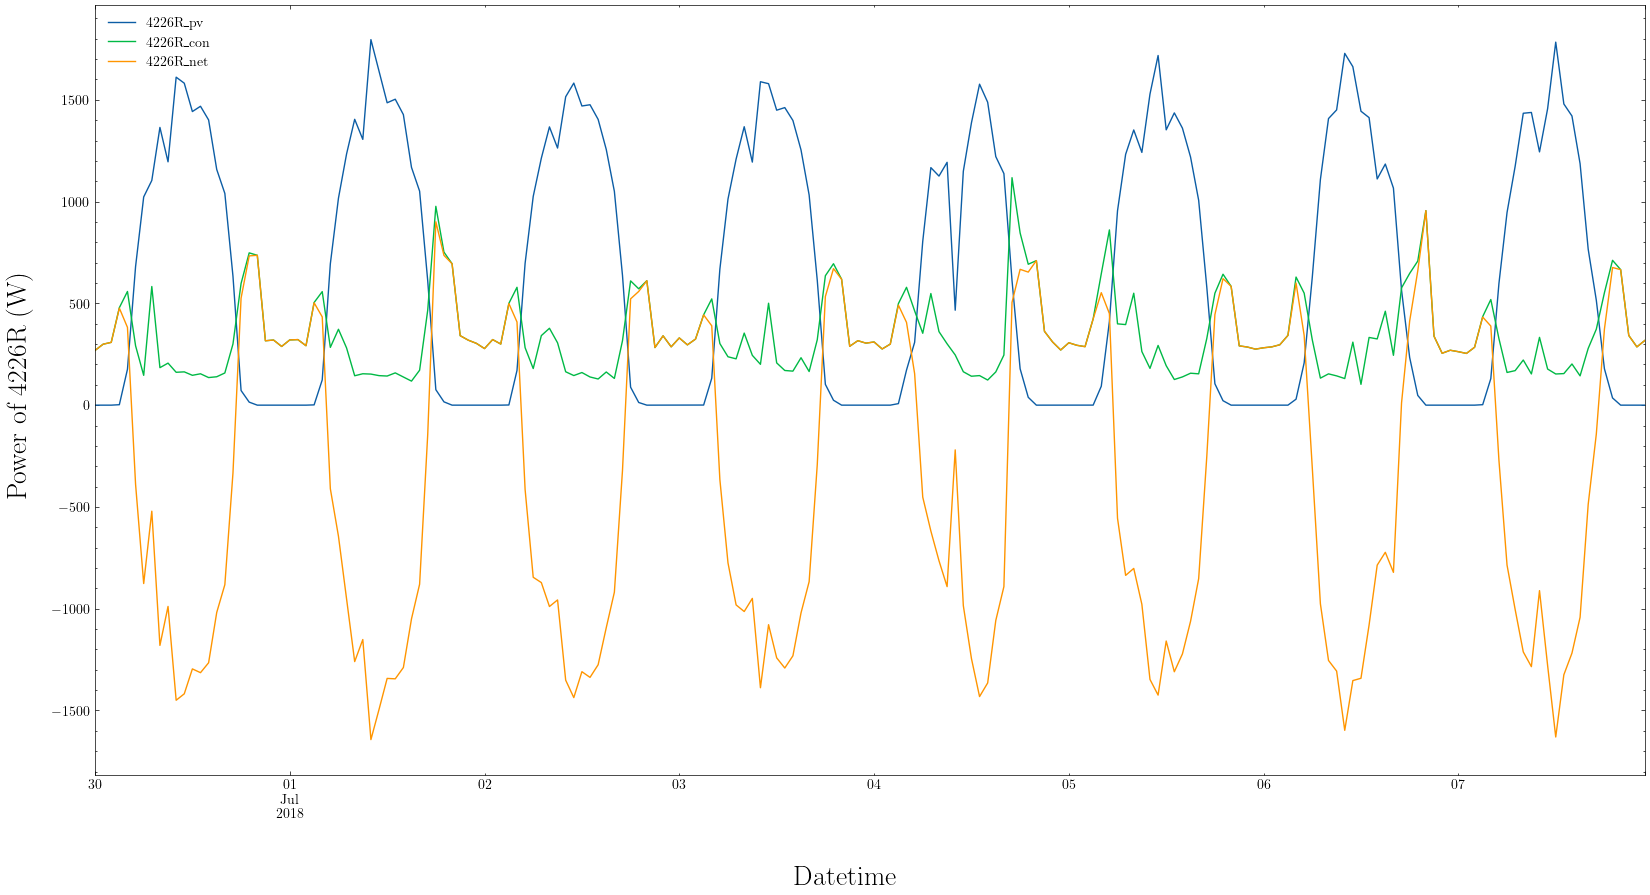

In [44]:
# Check summer days of 4226R. Plot the PV generation, consumption and net load of 4226R for the 2018.7.1-2018.7.7
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['4226R_pv', '4226R_con', '4226R_net'], year=[
                                    2018], doy_start=181, doy_end=188, ylabel='Power of 4226R (W)', layout=(1, 1), figsize=(20, 10), subplots=False)

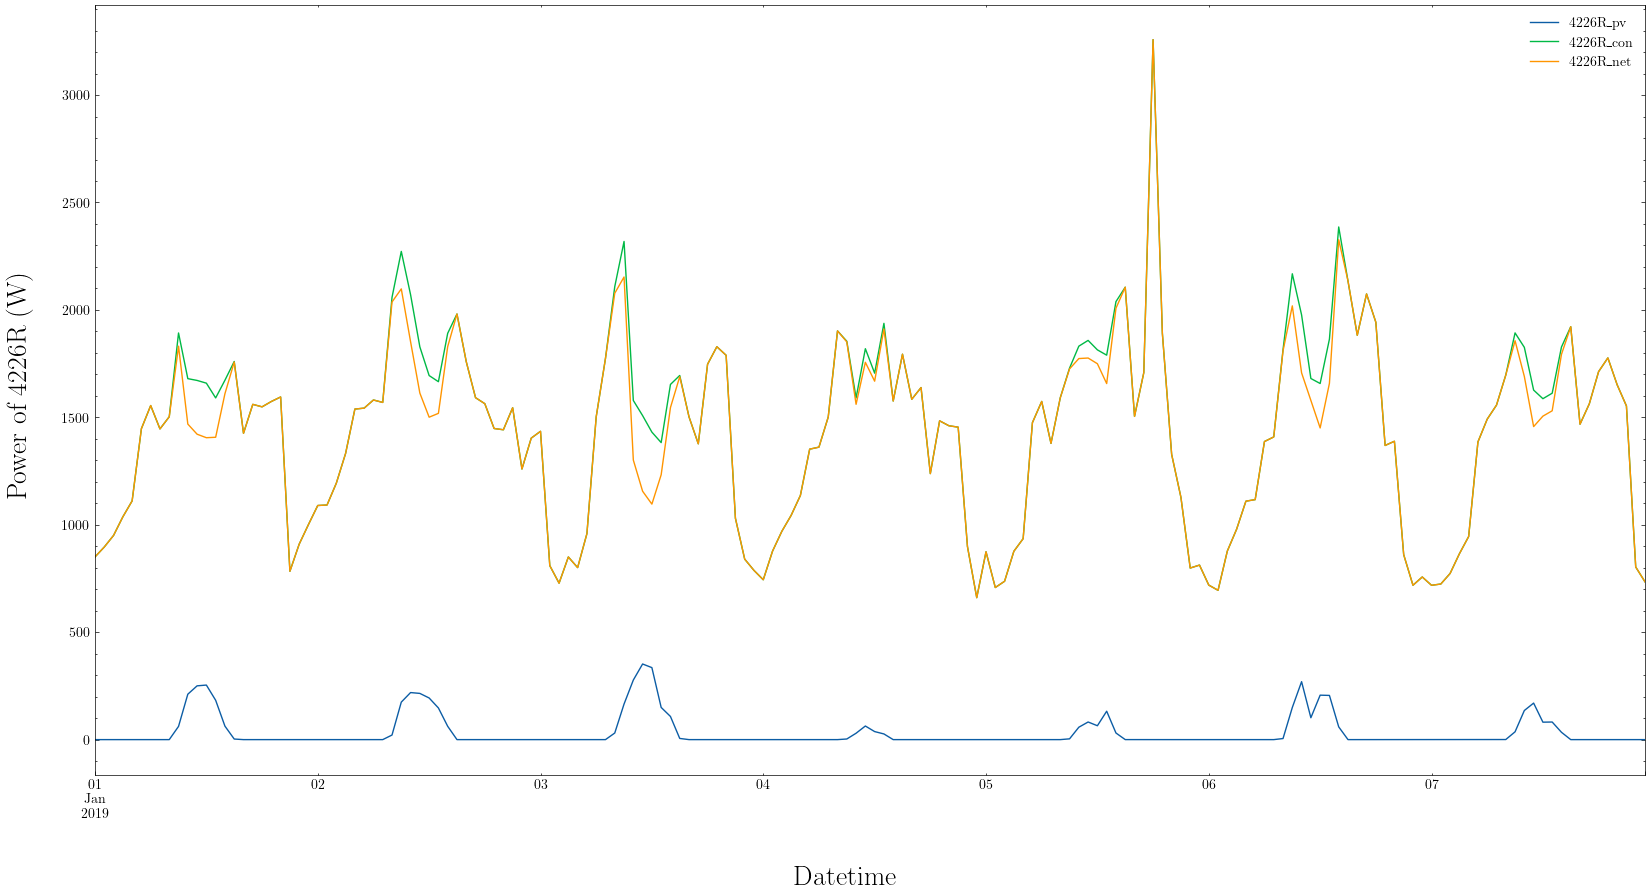

In [45]:
# check winter days of 4226R. Plot the PV generation, consumption and net load of 4226R for the 2019.1.1-2019.1.7
ams_explorer.df_common_xylabel_plot(df=ams_explorer.ams_data, y=['4226R_pv', '4226R_con', '4226R_net'], year=[
                                    2019], doy_start=1, doy_end=7, ylabel='Power of 4226R (W)', layout=(1, 1), figsize=(20, 10), subplots=False)

## Save processed data

In [46]:
ams_explorer.ams_data.describe()

datetime     Timestamp           HoD  \
count                          16960  1.696000e+04  16960.000000   
mean   2018-03-21 21:19:57.169811456  1.521667e+09     11.501887   
min              2017-04-02 11:00:00  1.491131e+09      0.000000   
25%              2017-09-26 02:45:00  1.506394e+09      5.750000   
50%              2018-03-21 22:30:00  1.521671e+09     12.000000   
75%              2018-09-14 14:15:00  1.536934e+09     18.000000   
max              2019-03-10 06:00:00  1.552198e+09     23.000000   
std                              NaN  1.763100e+07      6.923146   

                dow           doy         month          year      1011W_pv  \
count  16960.000000  16960.000000  16960.000000  16960.000000  14580.000000   
mean       2.999410    186.337087      6.638620   2017.709788    341.107503   
min        0.000000      1.000000      1.000000   2017.000000      0.000000   
25%        1.000000    100.000000      4.000000   2017.000000      0.000000   
50%        3.000000    189.000000      7.000000   2018.000000      0.000000   
75%        5.000000    277.000000     10.000000   2018.000000    420.550000   
max        6.000000    365.000000     12.000000   2019.000000   2784.000000   
std        1.999852    105.394955      3.445191      0.631895    599.352696   

          1954W_pv     1955A_pv  ...    7099P_net    7426U_net     7679U_net  \
count  7267.000000  7205.000000  ...  4145.000000  8238.000000  16107.000000   
mean    317.922458   289.430895  ...   675.625235   327.608194    -29.931086   
min       0.000000     0.000000  ... -1222.700000  -784.000000  -2774.200000   
25%       0.000000     0.000000  ...   506.100000   181.125000      6.200000   
50%       0.000000     0.000000  ...   632.700000   294.900000    137.000000   
75%     338.200000   335.800000  ...   884.400000   442.800000    240.750000   
max    2860.300000  2775.900000  ...  3364.400000  4095.800000   3586.400000   
std     596.264868   525.546497  ...   547.556878   419.493489    623.621917   

          7710F_net     7743P_net    8319Q_net    9248C_net     9370J_net  \
count  15061.000000    878.000000  8799.000000  8695.000000  16903.000000   
mean     400.657380   1167.023690   -43.662189    81.023715    -94.868077   
min    -1366.700000    -35.500000 -2422.900000  -834.200000  -2366.100000   
25%      102.000000    202.925000  -128.550000    16.300000   -216.150000   
50%      264.900000    486.450000   113.500000   103.300000     81.800000   
75%      691.700000    983.350000   284.750000   157.800000    163.700000   
max     4321.000000  11836.000000  2615.300000  2267.200000   2749.300000   
std      592.583187   2247.549514   679.917357   286.346048    603.740732   

          9506H_net    9991J_net  
count  10583.000000  7267.000000  
mean      58.953369   135.842136  
min        0.000000 -6064.300000  
25%        0.000000  -379.800000  
50%        0.000000   250.900000  
75%        0.200000   960.250000  
max     2187.600000  6996.200000  
std      225.070040  1761.623306  

[8 rows x 88 columns]

In [47]:
# save the processed dataframes to csv files
ams_explorer.ams_data.to_csv('../data/nl/ams_data_energy.csv', index=False)
ams_explorer.pv_data.to_csv('../data/nl/ams_data_pv.csv', index=False)
ams_explorer.con_data.to_csv('../data/nl/ams_data_con.csv', index=False)
ams_explorer.net_data.to_csv('../data/nl/ams_data_net.csv', index=False)